In [1]:
import os
import uproot4
import awkward1 as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep
import numba as nb
import h5py

In [2]:
from create_table import create_table

In [ ]:
help( ak.highlevel.Array )

In [ ]:
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPSp,.nGGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160355/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWWToJJMuNu_PtL-15_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160255/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWWToJJENu_PtL-15_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160227/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185019/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW8e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185049/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW2e-5_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185121/0000")

In [ ]:
#fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root"
fileName_ = "/eos/home-a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root"
#fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root"
root_ = uproot4.open( fileName_ )
print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

tree_ = root_["demo/SlimmedNtuple"]
 
keys_nonproton = ["run", "event", "lumiblock", "nVertices",
                  "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
                  "pfcand_nextracks", "pfcand_nextracks_noDRl",
                  "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi"]
keys_nonproton.extend( tree_.keys( filter_name="jet*") )
keys_nonproton.extend( tree_.keys( filter_name="muon*") )
keys_nonproton.extend( tree_.keys( filter_name="met*") )
keys_proton = tree_.keys( filter_name="proton*")
keys_ppstrack = tree_.keys( filter_name="pps_track*")
keys = []
keys.extend( keys_nonproton )
keys.extend( keys_proton )
keys.extend( keys_ppstrack )
print ( keys )

how_ = None
#how_= "zip"

keys_extra = [ 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift2', 'proton_rpid2' ]
for key_ in keys_extra:
    if key_ in keys: keys.remove( key_ )
print ( keys )

arrays = tree_.arrays( keys, library="ak", how=how_, entry_stop=10 )
print ( "\n" )
print ( arrays )
print ( ak.to_list( arrays ) )

arrays_extra = tree_.arrays( keys_extra, library="ak", how=how_, entry_stop=10 )
print ( "\n" )
print ( arrays_extra )
print ( ak.to_list( arrays_extra ) )


In [ ]:
if how_ == "zip":
    protons = arrays["proton"]
    protons["run"] = arrays["run"]
    protons["event"] = arrays["event"]
    protons["lumiblock"] = arrays["lumiblock"]
    print ( protons )
    print ( ak.to_list(protons) )
    
    ppstracks = arrays["pps_track"]
    ppstracks["run"] = arrays["run"]
    ppstracks["event"] = arrays["event"]
    ppstracks["lumiblock"] = arrays["lumiblock"]
    print ("\n")
    print ( ppstracks )
    print ( ak.to_list(ppstracks) )
    
    protons_extra = arrays_extra[ "proton" ]
    protons_multiRP = protons[ protons.ismultirp == 1 ]
    protons_multiRP[ "trackx2" ] = protons_extra[ "trackx2" ]
    protons_multiRP[ "tracky2" ] = protons_extra[ "tracky2" ]
    protons_multiRP[ "trackpixshift2" ] = protons_extra[ "trackpixshift2" ]
    protons_multiRP[ "rpid2" ] = protons_extra[ "rpid2" ]
    print ("\n")
    print ( protons_multiRP )
    print ( ak.to_list( protons_multiRP ) )  
    
else:
    arrays_proton = {}
    
    keys_ = keys_proton.copy()
    for key_ in keys_extra:
        if key_ in keys_: keys_.remove( key_ )
    print ( keys_ )
    
    for key_ in keys_: arrays_proton[ key_[ len("proton_") : ] ] = arrays[ key_ ]
    print ( arrays_proton )
    protons = ak.zip( arrays_proton )
    print ( protons )
    print ( ak.to_list( protons ) )
    
    arrays_proton_extra = {}
    
    for key_ in keys_extra: arrays_proton_extra[ key_[ len("proton_") : ] ] = arrays_extra[ key_ ]
    print ("\n")
    print ( arrays_proton_extra )
    protons_extra = ak.zip( arrays_proton_extra )
    print ( protons_extra )
    print ( ak.to_list( protons_extra ) )
    
    protons_multiRP = protons[ protons.ismultirp_ == 1 ]
    protons_multiRP[ "trackx2" ] = protons_extra[ "trackx2" ]
    protons_multiRP[ "tracky2" ] = protons_extra[ "tracky2" ]
    protons_multiRP[ "trackpixshift2" ] = protons_extra[ "trackpixshift2" ]
    protons_multiRP[ "rpid2" ] = protons_extra[ "rpid2" ]
    print ("\n")
    print ( protons_multiRP )
    print ( ak.to_list( protons_multiRP ) )  
        

In [ ]:
# def create_table( fileNames, label, random_protons=False, resample_factor=-1, read_size="150MB", firstEvent=None, entryStop=None, debug=False ):

#     fileNames_ = fileNames
#     label_ = label
#     random_protons_ = random_protons
#     resample_factor_ = resample_factor
#     read_size_ = read_size
#     firstEvent_ = firstEvent
#     entryStop_ = entryStop

#     #how_ = None
#     how_ = "zip"
    
#     print ( "Random protons: {}".format( random_protons_ ) )
    
#     resample = False
#     if resample_factor_ > 1: resample = True
#     print ( "Resample: {} / Resample factor: {}".format( resample,  resample_factor_ ) )

#     np.random.seed( 42 )

#     dset_chunk_size = 50000

#     columns_protons = ( "run", "lumiblock", "event", "slice", "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm",
#                         "jet0_pt", "jet0_eta", "jet0_phi", "jet0_energy", "jet0_mass", "jet0_corrmass", "jet0_tau1", "jet0_tau2", "jet0_vertexz",
#                         "muon0_pt", "muon0_eta", "muon0_phi", "muon0_energy", "muon0_charge", "muon0_iso", "muon0_dxy", "muon0_dz",
#                         "met", "met_x", "met_y", "met_phi",
#                         "nVertices",
#                         "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
#                         "pfcand_nextracks", "pfcand_nextracks_noDRl",
#                         "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi" )

#     columns_ppstracks = ( "run", "lumiblock", "event", "slice", "x", "y", "rpid" ) 

#     protons_keys = {}
#     for col_ in columns_protons:
#         protons_keys[ col_ ] = col_

#     ppstracks_keys = {}
#     for col_ in columns_ppstracks:
#         ppstracks_keys[ col_ ] = col_

#     counts_label_protons_ = "Proton" if not random_protons_ else "ProtonRnd"

#     with h5py.File( 'output-' + label_ + '.h5', 'w') as f:

#         dset_protons_multiRP = f.create_dataset( 'protons_multiRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
#         print ( "Initial dataset shape: {}".format( dset_protons_multiRP.shape ) )

#         dset_protons_singleRP = f.create_dataset( 'protons_singleRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
#         print ( "Initial dataset shape: {}".format( dset_protons_singleRP.shape ) )

#         dset_ppstracks = f.create_dataset( 'ppstracks', ( dset_chunk_size, len( columns_ppstracks ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_ppstracks ) ) )
#         print ( "Initial dataset shape: {}".format( dset_ppstracks.shape ) )

#         protons_multiRP_list = {}
#         for col_ in columns_protons:
#             protons_multiRP_list[ col_ ] = []           

#         protons_singleRP_list = {}
#         for col_ in columns_protons:
#             protons_singleRP_list[ col_ ] = []           

#         ppstracks_list = {}
#         for col_ in columns_ppstracks:
#             ppstracks_list[ col_ ] = []           

#         selections = None
#         counts = None

#         dset_multiRP_slice = 0
#         dset_multiRP_idx = 0
#         dset_multiRP_entries = 0

#         dset_singleRP_slice = 0
#         dset_singleRP_idx = 0
#         dset_singleRP_entries = 0

#         dset_ppstracks_slice = 0
#         dset_ppstracks_idx = 0
#         dset_ppstracks_entries = 0

#         for file_ in fileNames_:
#             print ( file_ ) 
#             root_ = uproot4.open( file_ )

#             print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

#             tree_ = root_["demo/SlimmedNtuple"]

#             keys_nonproton = [ "run", "event", "lumiblock", "nVertices",
#                                "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
#                                "pfcand_nextracks", "pfcand_nextracks_noDRl",
#                                "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi" ]
#             keys_nonproton.extend( tree_.keys( filter_name="jet*") )
#             keys_nonproton.extend( tree_.keys( filter_name="muon*") )
#             keys_nonproton.extend( tree_.keys( filter_name="met*") )
#             keys = []
#             keys.extend( keys_nonproton )
#             keys.extend( tree_.keys( filter_name="proton*") )
#             keys.extend( tree_.keys( filter_name="pps*") )
#             keys_remove = [ 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift2', 'proton_rpid2' ]
#             for key_ in keys_remove:
#                 if key_ in keys: keys.remove( key_ )
#             print ( keys )

#             for events_ in tree_.iterate( keys , library="ak", how=how_, step_size=read_size_, entry_start=firstEvent_, entry_stop=entryStop_ ):
#                 print ( len(events_), events_ )
#                 print ( "Num jets: {}".format( ak.num( events_["jet"] ) ) )
#                 print ( "Num muons: {}".format( ak.num( events_["muon"] ) ) )
#                 print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
#                 print ( "Num pps tracks: {}".format( ak.num( events_["pps_track"] ) ) )

#                 selections_ = []
#                 counts_ = []

#                 selections_.append( "All" )
#                 counts_.append( len( events_ ) )

#                 # Event selections
#                 msk_1jet = ( ak.num( events_["jet"] ) >= 1 )
#                 selections_.append( "Jet" )
#                 counts_.append( np.sum( np.array( msk_1jet ).astype("int32") ) )

#                 msk_1muon = msk_1jet & ( ak.num( events_["muon"] ) >= 1 )
#                 selections_.append( "Muon" )
#                 counts_.append( np.sum( np.array( msk_1muon ).astype("int32") ) )

#                 events_ = events_[ msk_1muon ]    

#                 selections_ = np.array( selections_ )
#                 counts_ = np.array( counts_ )

#                 # Repeat events by resample factor
#                 if resample:
#                     counts_ = counts_ * resample_factor_

#                 if selections is None:
#                     selections = selections_
#                     counts = counts_
#                 else:
#                     msk_selections = np.full_like( selections, False, dtype='bool' )
#                     for key in selections_:
#                         msk_selections |= ( selections == key )
#                     counts[ msk_selections ] += counts_

#                 # Repeat events by resample factor
#                 slices_ = np.zeros( len( events_ ), dtype=np.int32 )
#                 if resample:
#                     events_size_ = len( events_ )
#                     events_ = ak.concatenate( ( [events_] * resample_factor_ ), axis=0 )
#                     slices_ = np.zeros( resample_factor_ * events_size_, dtype=np.int32 )
#                     for idx_ in range( resample_factor_ ):
#                         slices_[ ( idx_ * events_size_ ) : ( ( idx_ + 1 ) * events_size_ ) ] = idx_

#                 events_[ "slice" ] = slices_

#                 # Randomize proton arrays
#                 #protons_ = events_["proton"]
#                 protons_ = None
#                 ppstracks_ = None
#                 if random_protons_:
#                     protons_ = events_["proton"]
#                     ppstracks_ = events_["pps_track"]

#                     index_rnd_ = np.random.permutation( len( events_ ) )

#                     protons_rnd_ = protons_[ index_rnd_ ]
#                     ppstracks_rnd_ = ppstracks_[ index_rnd_ ]

#                     events_[ "proton_rnd" ] = protons_rnd_
#                     events_[ "pps_track_rnd" ] = ppstracks_rnd_

#                     print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
#                     print ( "Num protons randomized: {}".format( ak.num( events_["proton_rnd"] ) ) )
#                     print ( "Num pps tracks: {}".format( ak.num( events_["pps_track"] ) ) )
#                     print ( "Num pps tracks randomized: {}".format( ak.num( events_["pps_track_rnd"] ) ) )

#                 if not random_protons_:
#                     protons_ = events_["proton"]
#                     ppstracks_ = events_["pps_track"]
#                 else:
#                     protons_ = events_["proton_rnd"]
#                     ppstracks_ = events_["pps_track_rnd"]
                    
#                 print ( "Num protons: {}".format( ak.num( protons_ ) ) )
#                 print ( "Num pps tracks: {}".format( ak.num( ppstracks_ ) ) )

#                 protons_["run"]                    = events_["run"]
#                 protons_["lumiblock"]              = events_["lumiblock"]
#                 protons_["event"]                  = events_["event"]
#                 protons_["slice"]                  = events_["slice"]
#                 protons_["jet0_pt"]                = events_.jet.pt[:,0]
#                 protons_["jet0_eta"]               = events_.jet.eta[:,0]
#                 protons_["jet0_phi"]               = events_.jet.phi[:,0]
#                 protons_["jet0_energy"]            = events_.jet.energy[:,0]
#                 protons_["jet0_mass"]              = events_.jet.mass[:,0]
#                 protons_["jet0_corrmass"]          = events_.jet.corrmass[:,0]
#                 protons_["jet0_tau1"]              = events_.jet.tau1[:,0]
#                 protons_["jet0_tau2"]              = events_.jet.tau2[:,0]
#                 protons_["jet0_vertexz"]           = events_.jet.vertexz[:,0]
#                 protons_["muon0_pt"]               = events_.muon.pt[:,0]
#                 protons_["muon0_eta"]              = events_.muon.eta[:,0]
#                 protons_["muon0_phi"]              = events_.muon.phi[:,0]
#                 protons_["muon0_energy"]           = events_.muon.e[:,0]
#                 protons_["muon0_charge"]           = events_.muon.charge[:,0]
#                 protons_["muon0_iso"]              = events_.muon.iso[:,0]
#                 protons_["muon0_dxy"]              = events_.muon.dxy[:,0]
#                 protons_["muon0_dz"]               = events_.muon.dz[:,0]
#                 protons_["met"]                    = events_["met"]
#                 protons_["met_x"]                  = events_["met_x"]
#                 protons_["met_y"]                  = events_["met_y"]
#                 protons_["met_phi"]                = events_["met_phi"]
#                 protons_["nVertices"]              = events_["nVertices"]
#                 protons_["num_bjets_ak8"]          = events_["num_bjets_ak8"]
#                 protons_["num_bjets_ak4"]          = events_["num_bjets_ak4"]
#                 protons_["num_jets_ak4"]           = events_["num_jets_ak4"]
#                 protons_["pfcand_nextracks"]       = events_["pfcand_nextracks"]
#                 protons_["pfcand_nextracks_noDRl"] = events_["pfcand_nextracks_noDRl"]
#                 protons_["recoMWhad"]              = events_["recoMWhad"]
#                 protons_["recoMWlep"]              = events_["recoMWlep"]
#                 protons_["recoMWW"]                = events_["recoMWW"]
#                 protons_["recoRapidityWW"]         = events_["recoRapidityWW"]
#                 protons_["dphiWW"]                 = events_["dphiWW"]
#                 protons_["WLeptonicPt"]            = events_["WLeptonicPt"]
#                 protons_["WLeptonicPhi"]           = events_["WLeptonicPhi"]
#                 #protons_["x1"] = -999.
#                 #protons_["y1"] = -999.
#                 #protons_["x2"] = -999.
#                 #protons_["y2"] = -999.
                
#                 #ppstracks_ = events_["pps_track"]
#                 ppstracks_["run"] = events_["run"]
#                 ppstracks_["lumiblock"] = events_["lumiblock"]
#                 ppstracks_["event"] = events_["event"]
#                 ppstracks_["slice"] = events_["slice"]

#                 protons_singleRP_ = protons_[ protons_.ismultirp == 0 ]
#                 protons_multiRP_ = protons_[ protons_.ismultirp == 1 ]

#                 protons_singleRP_byRP_ = {}
#                 ppstracks_byRP_ = {}
#                 protons_multiRP_byArm_ = {}
#                 for rpid in ( 3, 23, 103, 123 ):
#                     #arm = -1
#                     #if   rpid == 3   or rpid == 23 : arm = 0
#                     #elif rpid == 103 or rpid == 123 : arm = 1
#                     #print ( "Arm: {}".format( arm ) )

#                     protons_singleRP_byRP_[ rpid ] =  protons_singleRP_[ protons_singleRP_.rpid == rpid ]
#                     ppstracks_byRP_[ rpid ] = ppstracks_[ ppstracks_.rpid == rpid ]
#                     #protons_singleRP_byRP_[ rpid ]["x1"] = ppstracks_byRP_[ rpid ].x
#                     #protons_singleRP_byRP_[ rpid ]["y1"] = ppstracks_byRP_[ rpid ].y

#                     print ( "\nNum protons RP {}: {}".format( rpid, ak.num( protons_singleRP_byRP_[ rpid ] ) ) )
#                     if debug:
#                         print ( ak.to_list( protons_singleRP_byRP_[ rpid ] ) )
#                         print ("\n")
#                         print ( ak.to_list( ppstracks_byRP_[ rpid ] ) )

#                 for arm in ( 0, 1 ):
#                     protons_multiRP_byArm_[ arm ] = protons_multiRP_[ protons_multiRP_.arm == arm ]

#                     print ( "\nNum multi-RP protons Arm {}: {}".format( arm, ak.num( protons_multiRP_byArm_[ arm ] ) ) )
#                     if debug:
#                         print ( ak.to_list( protons_multiRP_byArm_[ arm ] ) )

#                 #msk  =  np.array( ak.num( protons_singleRP_byRP_[ 3 ].xi ) == 1 )
#                 #msk &= np.array( ak.num( protons_singleRP_byRP_[ 23 ].xi ) == 1 )
#                 #msk &= np.array( ak.num( protons_singleRP_byRP_[ 103 ].xi ) == 1 )
#                 #msk &= np.array( ak.num( protons_singleRP_byRP_[ 123 ].xi ) == 1 )    

#                 msk_protons  = np.array( ak.num( protons_multiRP_byArm_[ 0 ] ) > 0 )
#                 msk_protons &= np.array( ak.num( protons_multiRP_byArm_[ 1 ] ) > 0 )

#                 protons_multiRP_sel_ = protons_multiRP_[ msk_protons ]
#                 protons_singleRP_sel_ = protons_singleRP_[ msk_protons ]
#                 ppstracks_sel_ = ppstracks_[ msk_protons ]
#                 print ("\n")
#                 if debug:
#                     print ( msk_protons )
#                 print ( len( protons_multiRP_sel_ ) )
#                 print ( ak.num( protons_multiRP_sel_ ) )
#                 if debug:
#                     print ("\n")
#                     print ( ak.to_list( protons_multiRP_sel_ ) )
#                     print ("\n")
#                     print ( ak.to_list( protons_singleRP_sel_ ) )
#                     print ("\n")
#                     print ( ak.to_list( ppstracks_sel_ ) )

#                 counts_protons_ = len( protons_[ msk_protons ] )
#                 if not counts_label_protons_ in selections:
#                     selections = np.concatenate( ( selections, np.array( [ counts_label_protons_ ] ) ) )
#                     counts = np.concatenate( ( counts, np.array( [counts_protons_] ) ) )
#                 else:    
#                     counts[ selections == counts_label_protons_ ] += counts_protons_ 

#                 print ( selections )
#                 print ( counts )

#                 for col_ in columns_protons:
#                     protons_multiRP_list[ col_ ] = np.array( ak.flatten( protons_multiRP_sel_[ protons_keys[ col_ ] ] ) )

#                 arr_size_multiRP_ = len( protons_multiRP_list[ "xi" ] )
#                 print ( "Flattened array size multi-RP: {}".format( arr_size_multiRP_ ) )

#                 for col_ in columns_protons:
#                     protons_singleRP_list[ col_ ] = np.array( ak.flatten( protons_singleRP_sel_[ protons_keys[ col_ ] ] ) )

#                 arr_size_singleRP_ = len( protons_singleRP_list[ "xi" ] )
#                 print ( "Flattened array size single-RP: {}".format( arr_size_singleRP_ ) )

#                 for col_ in columns_ppstracks:
#                     ppstracks_list[ col_ ] = np.array( ak.flatten( ppstracks_sel_[ ppstracks_keys[ col_ ] ] ) )

#                 arr_size_ppstracks_ = len( ppstracks_list[ "x" ] )
#                 print ( "Flattened array size tracks: {}".format( arr_size_ppstracks_ ) )

#                 dset_multiRP_entries += arr_size_multiRP_
#                 dset_singleRP_entries += arr_size_singleRP_
#                 dset_ppstracks_entries += arr_size_ppstracks_

#                 if dset_multiRP_entries > dset_chunk_size:
#                     resize_factor_ = ( dset_multiRP_entries // dset_chunk_size )
#                     chunk_resize_  = resize_factor_ * dset_chunk_size

#                     print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
#                     dset_protons_multiRP.resize( ( dset_protons_multiRP.shape[0] + chunk_resize_ ), axis=0 )
#                     print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )

#                     dset_multiRP_slice += resize_factor_
#                     # Count the rest to the chunk size 
#                     dset_multiRP_entries = ( dset_multiRP_entries % dset_chunk_size )

#                 if dset_singleRP_entries > dset_chunk_size:
#                     resize_factor_ = ( dset_singleRP_entries // dset_chunk_size )
#                     chunk_resize_  = resize_factor_ * dset_chunk_size

#                     print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
#                     dset_protons_singleRP.resize( ( dset_protons_singleRP.shape[0] + chunk_resize_ ), axis=0 )
#                     print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )

#                     dset_singleRP_slice += resize_factor_
#                     # Count the rest to the chunk size 
#                     dset_singleRP_entries = ( dset_singleRP_entries % dset_chunk_size )

#                 if dset_ppstracks_entries > dset_chunk_size:
#                     resize_factor_ = ( dset_ppstracks_entries // dset_chunk_size )
#                     chunk_resize_  = resize_factor_ * dset_chunk_size

#                     print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
#                     dset_ppstracks.resize( ( dset_ppstracks.shape[0] + chunk_resize_ ), axis=0 )
#                     print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )

#                     dset_ppstracks_slice += resize_factor_
#                     # Count the rest to the chunk size 
#                     dset_ppstracks_entries = ( dset_ppstracks_entries % dset_chunk_size )

#                 print ( "Stacking data." )
#                 data_protons_multiRP_ = np.stack( list( protons_multiRP_list.values() ), axis=1 )
#                 print ( data_protons_multiRP_.shape )
#                 print ( data_protons_multiRP_ )

#                 data_protons_singleRP_ = np.stack( list( protons_singleRP_list.values() ), axis=1 )
#                 print ( data_protons_singleRP_.shape )
#                 print ( data_protons_singleRP_ )

#                 data_ppstracks_ = np.stack( list( ppstracks_list.values() ), axis=1 )
#                 print ( data_ppstracks_.shape )
#                 print ( data_ppstracks_ )

#                 dset_idx_next_ = dset_multiRP_idx + arr_size_multiRP_
#                 print ( "Slice: {}".format( dset_multiRP_slice ) )
#                 print ( "Writing in positions ({},{})".format( dset_multiRP_idx, dset_idx_next_ ) )
#                 dset_protons_multiRP[ dset_multiRP_idx : dset_idx_next_ ] = data_protons_multiRP_
#                 dset_multiRP_idx = dset_idx_next_ 

#                 dset_idx_next_ = dset_singleRP_idx + arr_size_singleRP_
#                 print ( "Slice: {}".format( dset_singleRP_slice ) )
#                 print ( "Writing in positions ({},{})".format( dset_singleRP_idx, dset_idx_next_ ) )
#                 dset_protons_singleRP[ dset_singleRP_idx : dset_idx_next_ ] = data_protons_singleRP_
#                 dset_singleRP_idx = dset_idx_next_ 

#                 dset_idx_next_ = dset_ppstracks_idx + arr_size_ppstracks_
#                 print ( "Slice: {}".format( dset_ppstracks_slice ) )
#                 print ( "Writing in positions ({},{})".format( dset_ppstracks_idx, dset_idx_next_ ) )
#                 dset_ppstracks[ dset_ppstracks_idx : dset_idx_next_ ] = data_ppstracks_
#                 dset_ppstracks_idx = dset_idx_next_ 

#             # Iteration on input files
#             root_.close()

#         # Reduce dataset to its final size 
#         print ( "Reduce dataset." )
#         dset_protons_multiRP.resize( ( dset_multiRP_idx ), axis=0 ) 
#         print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )

#         dset_protons_singleRP.resize( ( dset_singleRP_idx ), axis=0 ) 
#         print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )

#         dset_ppstracks.resize( ( dset_ppstracks_idx ), axis=0 ) 
#         print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )

#         print ( "Writing column names and event counts.")

#         columns_protons_ = np.array( columns_protons, dtype='S' )
#         print ( columns_protons_ )

#         columns_ppstracks_ = np.array( columns_ppstracks, dtype='S' )
#         print ( columns_ppstracks_ )

#         event_counts_ = counts
#         print ( event_counts_ )

#         selections_ = np.array( selections, dtype='S' )
#         print ( selections_ )

#         dset_columns_protons = f.create_dataset( 'columns_protons', data=columns_protons_ )
#         dset_columns_ppstracks = f.create_dataset( 'columns_ppstracks', data=columns_ppstracks_ )
#         dset_counts = f.create_dataset( 'event_counts', data=event_counts_ )
#         dset_selections = f.create_dataset( 'selections', data=selections_ )

#         print ( dset_protons_multiRP )
#         print ( dset_protons_multiRP[-1] )
#         print ( dset_protons_singleRP )
#         print ( dset_protons_singleRP[-1] )   
#         print ( dset_ppstracks )
#         print ( dset_ppstracks[-1] )   

#         print ( dset_columns_protons )
#         print ( list( dset_columns_protons ) )
#         print ( dset_columns_ppstracks )
#         print ( list( dset_columns_ppstracks ) )   
#         print ( dset_counts )
#         print ( list( dset_counts ) )
#         print ( dset_selections )
#         print ( list( dset_selections ) )

In [3]:
run_tables = True

debug = False

fileNames_A0W_ACW = {}
fileNames_A0W_ACW[ "A0W1e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "A0W2e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "A0W5e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160355/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "ACW5e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185019/0000/SlimmedNtuple_1.root"
]
fileNames_A0W_ACW[ "ACW8e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW8e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185049/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "ACW2e-5" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW2e-5_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185121/0000/SlimmedNtuple_merged_0.root"
]

#label = "GGToWW-AQGC-test"
label = "GGToWW-AQGC"
firstEvent = None
entryStop = None
#read_size = "150MB"
step_size = 100000

if run_tables:
    for key_ in fileNames_A0W_ACW:
        import time
        print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
        time_s_ = time.time()
        
        print ( key_, fileNames_A0W_ACW[ key_ ] )
        label_ = "{}-{}".format( label, key_ )
        create_table( fileNames_A0W_ACW[ key_ ], label=label_, random_protons=False, resample_factor=-1, step_size=step_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        
        time_e_ = time.time()
        print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/03 19:13:11
A0W1e-6 ['/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root']
Random protons: False
Resample: False / Resample factor: -1
Initial dataset shape: (50000, 53)
Initial dataset shape: (50000, 49)
Initial dataset shape: (50000, 7)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root
Number of events in tree: 34159
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sf

Total time elapsed: 9
2021/02/03 19:13:19
A0W2e-6 ['/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000/SlimmedNtuple_merged_0.root']
Random protons: False
Resample: False / Resample factor: -1
Initial dataset shape: (50000, 53)
Initial dataset shape: (50000, 49)
Initial dataset shape: (50000, 7)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000/SlimmedNtuple_merged_0.root
Number of events in tree: 74109
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_

Number of events in tree: 190187
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
100000 [{run: 1, event: 104807, lumiblock:

Reduce dataset.
Dataset shape: (34546, 53)
Dataset shape: (69092, 49)
Dataset shape: (69092, 7)
Writing column names and event counts.
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_tau2'
 b'jet0_vertexz' b'muon0_pt' b'muon0_eta' b'muon0_phi' b'muon0_energy'
 b'muon0_charge' b'muon0_iso' b'muon0_dxy' b'muon0_dz' b'met' b'met_x'
 b'met_y' b'met_phi' b'nVertices' b'num_bjets_ak8' b'num_bjets_ak4'
 b'num_jets_ak4' b'pfcand_nextracks' b'pfcand_nextracks_noDRl'
 b'recoMWhad' b'recoMWlep' b'recoMWW' b'recoRapidityWW' b'dphiWW'
 b'WLeptonicPt' b'WLeptonicPhi' b'trackx1' b'tracky1' b'trackpixshift1'
 b'rpid1' b'trackx2' b'tracky2' b'trackpixshift2' b'rpid2']
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_



586
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'Proton']
[4961 4961 2562  586]
Flattened array size multi-RP: 1172
Flattened array size single-RP: 2344
Flattened array size tracks: 2344
Stacking data.
(1172, 53)
[[ 1.00000000e+00  2.54000000e+02  2.53170000e+04 ...  4.99969482e-01
   0.00000000e+00  2.30000000e+01]
 [ 1.00000000e+00  2.54000000e+02  2.53170000e+04 ... -1.40002441e+00
   0.00000000e+00  1.23000000e+02]
 [ 1.00000000e+00  2.54000000e+02  2.53460000e+04 ...  1.59997559e+00
   0.00000000e+00  2.30000000e+01]
 ...
 [ 1.00000000e+00  6.65000000e+03  1.64932000e+05 ...  7.99987793e-01
   0.00000000e+00  1.23000000e+02]
 [ 1.00000000e+00  6.65100000e+03  1.65031000e+05 ...  4.25000000e+00
   0.00000000e+00  2.30000000e+01]
 [ 1.00000000e+00  6.65100000e+03  1.65031000e+05 ...  2.69995117e+00
   0.00000000e+00  1.23000000e+02]]
(2344, 49)
[[ 1.00000000e+00  2.54000000e+02  2.53170000e+04 ...  4.80255127e-01
   0.0

91967 [{run: 1, event: 80915, lumiblock: 810, nVertices: 31, ... pps_track_rpid: []}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, ... 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
Num protons: [6, 0, 1, 3, 3, 3, 3, 6, 1, 0, 3, 4, 6, 3, ... 3, 3, 0, 3, 6, 3, 3, 0, 0, 3, 6, 1, 0]
Num pps tracks: [4, 0, 1, 2, 2, 2, 2, 4, 1, 0, 2, 3, 4, 2, ... 2, 2, 0, 2, 4, 2, 2, 0, 0, 2, 4, 1, 0]
Run: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Lumi: [810, 810, 810, 810, 810, 810, 810, 811, ... 997, 997, 998, 998, 998, 998, 998, 998]
Event: [80915, 80905, 80921, 80947, 80959, 80969, ... 99733, 99751, 99768, 99776, 99790]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1,

Number of events in tree: 197331
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
100000 [{run: 1, event: 66701, lumiblock: 

Reduce dataset.
Dataset shape: (36548, 53)
Dataset shape: (73096, 49)
Dataset shape: (73096, 7)
Writing column names and event counts.
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_tau2'
 b'jet0_vertexz' b'muon0_pt' b'muon0_eta' b'muon0_phi' b'muon0_energy'
 b'muon0_charge' b'muon0_iso' b'muon0_dxy' b'muon0_dz' b'met' b'met_x'
 b'met_y' b'met_phi' b'nVertices' b'num_bjets_ak8' b'num_bjets_ak4'
 b'num_jets_ak4' b'pfcand_nextracks' b'pfcand_nextracks_noDRl'
 b'recoMWhad' b'recoMWlep' b'recoMWW' b'recoRapidityWW' b'dphiWW'
 b'WLeptonicPt' b'WLeptonicPhi' b'trackx1' b'tracky1' b'trackpixshift1'
 b'rpid1' b'trackx2' b'tracky2' b'trackpixshift2' b'rpid2']
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_

In [4]:
run_tables = True

debug = False

fileNames_data = {}
fileNames_data[ "2017B" ] = [
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root"
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root"
]
fileNames_data[ "2017C" ] = [
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_0.root",
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_1.root"
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-withDilepton/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-withDilepton/0000/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-withDilepton/0001/SlimmedNtuple_merged_0.root"
]
fileNames_data[ "2017D" ] = [
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/SlimmedNtuple_merged_0.root"
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-withDilepton/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-withDilepton/0000/SlimmedNtuple_merged_1.root"
]
fileNames_data[ "2017E" ] = [
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_0.root",
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_1.root"
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-withDilepton/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-withDilepton/0000/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-withDilepton/0001/SlimmedNtuple_merged_0.root"
]
fileNames_data[ "2017F" ] = [
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_0.root",
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_1.root"
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001/SlimmedNtuple_merged_0.root"
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0000/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0001/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0001/SlimmedNtuple_merged_1.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0002/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0003/SlimmedNtuple_merged_0.root"
]

#label = "data-test"
#label = "data-test-rnd-run-info"
#label = "data-random-resample_20-test"
label = "data"
firstEvent = None
entryStop = None
#read_size = "150MB"
step_size = 100000
random_protons = False
resample_factor = -1
#random_protons = True
#resample_factor = 20

if run_tables:
    for key_ in fileNames_data:
        import time
        print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
        time_s_ = time.time()

        print ( key_, fileNames_data[ key_ ] )
        label_ = "{}-{}".format( label, key_ )
        create_table( fileNames_data[ key_ ], label=label_, random_protons=random_protons, resample_factor=resample_factor, step_size=step_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        
        time_e_ = time.time()
        print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/03 19:15:00
2017B ['/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root']
Random protons: False
Resample: False / Resample factor: -1
Initial dataset shape: (50000, 53)
Initial dataset shape: (50000, 49)
Initial dataset shape: (50000, 7)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root
Number of events in tree: 74007
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso'

Number of events in tree: 67415
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
67415 [{run: 299480, event: 317391607, lumi

Flattened array size multi-RP: 11844
Flattened array size single-RP: 25686
Flattened array size tracks: 36105
Resizing output dataset by 50000 entries.
Dataset shape: (100000, 7)
Stacking data.
(11844, 53)
[[ 3.00777000e+05  4.76000000e+02  7.34710156e+08 ...  1.71777344e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.00777000e+05  4.76000000e+02  7.34710156e+08 ...  1.44384766e+00
   0.00000000e+00  1.23000000e+02]
 [ 3.00576000e+05  2.70000000e+02  4.15645875e+08 ...  7.02941895e-01
   0.00000000e+00  2.30000000e+01]
 ...
 [ 3.00576000e+05  3.20000000e+01  4.30320480e+07 ...  2.44796753e-01
   0.00000000e+00  1.23000000e+02]
 [ 3.00576000e+05  3.20000000e+01  4.32840190e+07 ...  1.59448242e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.00576000e+05  3.20000000e+01  4.32840190e+07 ... -1.05517578e+00
   0.00000000e+00  1.23000000e+02]]
(25686, 49)
[[ 3.00777000e+05  4.76000000e+02  7.34710156e+08 ...  1.50036621e+00
   0.00000000e+00  3.00000000e+00]
 [ 3.00777000e+05  4.76000000e+02  7.3471

Num protons: [4, 3, 2, 3, 3, 1, 5, 2, 6, 1, 3, 2, 3, 3, ... 5, 6, 5, 4, 4, 3, 3, 5, 1, 5, 2, 5, 4]
Num pps tracks: [3, 2, 2, 2, 3, 1, 4, 2, 4, 1, 2, 2, 4, 3, ... 5, 5, 5, 3, 6, 4, 4, 4, 1, 4, 4, 6, 4]
Num protons extra: [1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, ... 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]

Num protons RP 3: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ... 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

Num protons RP 23: [1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, ... 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 4]

Num protons RP 103: [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, ... 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Num protons RP 123: [1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, ... 2, 1, 3, 1, 3, 2, 0, 2, 0, 2, 0, 3, 0]

Num multi-RP protons Arm 0: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ... 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

Num multi-RP protons Arm 1: [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ... 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


5598
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

Number of events in tree: 88118
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
88118 [{run: 302031, event: 7191, lumiblock

Flattened array size multi-RP: 4536
Flattened array size single-RP: 10658
Flattened array size tracks: 12305
Stacking data.
(4536, 53)
[[ 3.02163000e+05  9.05000000e+02  7.78736087e+08 ...  1.08264160e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.02163000e+05  9.05000000e+02  7.78736087e+08 ...  6.26464844e-01
   0.00000000e+00  1.23000000e+02]
 [ 3.02163000e+05  1.04700000e+03  8.77473678e+08 ... -1.21447754e+00
   0.00000000e+00  2.30000000e+01]
 ...
 [ 3.02344000e+05  2.45000000e+02  2.21474338e+08 ... -1.02734375e+00
   0.00000000e+00  1.23000000e+02]
 [ 3.02344000e+05  3.06000000e+02  2.72138782e+08 ... -2.04541016e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.02344000e+05  3.06000000e+02  2.72138782e+08 ...  1.26843262e+00
   0.00000000e+00  1.23000000e+02]]
(10658, 49)
[[ 3.02163000e+05  9.05000000e+02  7.78736087e+08 ...  9.90173340e-01
   0.00000000e+00  3.00000000e+00]
 [ 3.02163000e+05  9.05000000e+02  7.78736087e+08 ...  1.08264160e+00
   1.00000000e+00  2.30000000e+01]
 [ 3.02

83109 [{run: 303885, event: 360915777, lumiblock: 268, nVertices: 30, ... 116, 116, 116]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1]
Num protons: [3, 1, 3, 2, 1, 1, 1, 0, 1, 2, 4, 2, 4, 0, ... 5, 3, 4, 2, 2, 4, 1, 0, 2, 4, 5, 3, 0]
Num pps tracks: [3, 1, 2, 2, 1, 1, 8, 0, 5, 2, 4, 6, 3, 0, ... 5, 4, 4, 2, 8, 6, 1, 1, 4, 4, 5, 4, 4]
Run: [303885, 303885, 303885, 303885, 303885, ... 304354, 304354, 304354, 304354, 304354]
Lumi: [268, 268, 268, 875, 875, 875, 875, 1265, ... 238, 238, 238, 238, 238, 238, 238, 238]
Event: [360915777, 360541820, 360489825, 1234771636, ... 305623644, 305144626, 306593460]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

27551 [{run: 304562, event: 1307366462, lumiblock: 762, nVertices: 49, ... 23, 23, 23]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, ... 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
Num protons: [0, 1, 4, 0, 0, 4, 3, 3, 3, 4, 2, 0, 3, 2, ... 4, 3, 2, 4, 3, 1, 3, 6, 0, 4, 5, 5, 3]
Num pps tracks: [0, 2, 5, 0, 0, 5, 2, 3, 4, 3, 3, 0, 3, 3, ... 5, 3, 2, 3, 3, 2, 2, 7, 0, 4, 5, 4, 4]
Run: [304158, 304158, 304158, 304158, 304158, ... 304292, 304292, 304292, 304292, 304292]
Lumi: [1142, 1142, 1142, 1142, 1194, 1194, 1194, ... 423, 423, 423, 450, 450, 450, 450]
Event: [1453053082, 1453868965, 1453985772, 1453307817, ... 865161496, 865394426, 865141886]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, ...

Reduce dataset.
Dataset shape: (5792, 53)
Dataset shape: (12619, 49)
Dataset shape: (13746, 7)
Writing column names and event counts.
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_tau2'
 b'jet0_vertexz' b'muon0_pt' b'muon0_eta' b'muon0_phi' b'muon0_energy'
 b'muon0_charge' b'muon0_iso' b'muon0_dxy' b'muon0_dz' b'met' b'met_x'
 b'met_y' b'met_phi' b'nVertices' b'num_bjets_ak8' b'num_bjets_ak4'
 b'num_jets_ak4' b'pfcand_nextracks' b'pfcand_nextracks_noDRl'
 b'recoMWhad' b'recoMWlep' b'recoMWW' b'recoRapidityWW' b'dphiWW'
 b'WLeptonicPt' b'WLeptonicPhi' b'trackx1' b'tracky1' b'trackpixshift1'
 b'rpid1' b'trackx2' b'tracky2' b'trackpixshift2' b'rpid2']
[b'run' b'lumiblock' b'event' b'slice' b'xi' b'thx' b'thy' b't'
 b'ismultirp' b'rpid' b'arm' b'jet0_pt' b'jet0_eta' b'jet0_phi'
 b'jet0_energy' b'jet0_mass' b'jet0_corrmass' b'jet0_tau1' b'jet0_t


Num protons RP 3: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Num protons RP 23: [1, 3, 0, 2, 1, 4, 2, 2, 1, 2, 1, 9, 0, 2, ... 4, 4, 0, 2, 2, 3, 1, 4, 2, 2, 1, 1, 1]

Num protons RP 103: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ... 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

Num protons RP 123: [0, 1, 1, 1, 2, 0, 1, 2, 3, 1, 1, 2, 1, 0, ... 1, 2, 0, 3, 1, 2, 0, 3, 5, 2, 2, 0, 3]

Num multi-RP protons Arm 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Num multi-RP protons Arm 1: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ... 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


3014
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'Proton']
[55051 55051 54158  3014]
Flattened array size multi-RP: 6028
Flattened array size single-RP: 14555
Flattened array size tracks: 15004
Stacking data.
(6028, 53)
[[ 3.05336000e+05  2.04000000e+02  3.31789341e+08 ...  4.1293

Slice: 0
Writing in positions (15004,38793)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0001/SlimmedNtuple_merged_0.root
Number of events in tree: 47929
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackp


Num protons RP 3: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, ... 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]

Num protons RP 23: [0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 4, 2, ... 0, 0, 0, 1, 1, 2, 0, 4, 4, 1, 2, 1, 0]

Num protons RP 103: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

Num protons RP 123: [2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 6, 0]

Num multi-RP protons Arm 0: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ... 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]

Num multi-RP protons Arm 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


2982
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'Proton']
[256222 256222 252045  13540]
Flattened array size multi-RP: 5964
Flattened array size single-RP: 15033
Flattened array size tracks: 15583
Stacking data.
(5964, 53)
[[ 3.05248000e+05  7.62000000e+02  1.34872067e+09 ...  3.

/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-withDilepton/0003/SlimmedNtuple_merged_0.root
Number of events in tree: 82632
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_

In [5]:
run_tables = True

debug = False

#label = "data-random-resample_20-test"
#label = "data-random-resample_20-test-rnd-run-info"
label = "data-random-resample_20"
firstEvent = None
entryStop = None
#read_size = "150MB"
step_size = 50000
random_protons = True
resample_factor = 20

if run_tables:
    for key_ in fileNames_data:
        import time
        print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
        time_s_ = time.time()

        print ( key_, fileNames_data[ key_ ] )
        label_ = "{}-{}".format( label, key_ )
        create_table( fileNames_data[ key_ ], label=label_, random_protons=random_protons, resample_factor=resample_factor, step_size=step_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        
        time_e_ = time.time()
        print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/02/03 19:24:48
2017B ['/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root']
Random protons: True
Resample: True / Resample factor: 20
Initial dataset shape: (50000, 57)
Initial dataset shape: (50000, 53)
Initial dataset shape: (50000, 11)
/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-withDilepton/0000/SlimmedNtuple_merged_0.root
Number of events in tree: 74007
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso',

Run: [297050, 297050, 297050, 297050, 297050, ... 297293, 297293, 297293, 297293, 297293]
Run randomized: [297215, 297227, 297411, 297426, 297411, ... 297426, 297050, 297429, 297178, 299065]
Lumi: [320, 320, 320, 298, 298, 298, 298, 298, 298, ... 688, 688, 688, 11, 11, 11, 11, 11]
Lumi randomized: [9, 129, 634, 46, 302, 485, 1072, 747, 428, ... 256, 27, 407, 91, 531, 23, 1037, 323]
Event: [405027058, 404614448, 404334912, 377829099, ... 15621261, 16607421, 16079379]
Event randomized: [14031718, 96253530, 1054760207, 81814217, ... 37969793, 1227337771, 458478498]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Slice randomized: [15, 14, 18, 12, 10, 8, 4, 17, 17, 0, 6, ... 10, 0, 7, 16, 17, 11, 10, 18, 7, 15, 13]
Num protons: [1, 6, 3, 0, 1, 0, 3, 3, 0, 3, 3, 4, 1, 2, ... 1, 0, 1, 4, 2, 1, 1, 1, 1, 0, 0, 1, 1]
Num protons randomized: [4, 0, 5, 5, 0, 3, 1, 3, 3, 0, 1, 4, 0, 0, ... 0, 2, 3, 3, 5, 0, 4, 6, 0, 2, 0, 0, 0]
Num pps tracks: [1, 4, 3, 

Number of events in tree: 67415
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
50000 [{run: 299480, event: 317391607, lumi


Num protons RP 3: [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ... 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

Num protons RP 23: [0, 0, 0, 0, 0, 1, 8, 2, 0, 0, 0, 3, 2, 0, ... 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0]

Num protons RP 103: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ... 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]

Num protons RP 123: [0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 5, 3, 0, ... 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]

Num multi-RP protons Arm 0: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

Num multi-RP protons Arm 1: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ... 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


20660
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[1348300 1348300 1323760   80520]
Flattened array size multi-RP: 41320
Flattened array size single-RP: 88820
Flattened array size tracks: 124800
Resizing output dataset by 50000 entries.
Dataset shape: (200000, 57)
Res

(257900, 53)
[[ 3.00777000e+05  3.07000000e+02  4.69505823e+08 ... -6.39282227e-01
   0.00000000e+00  3.00000000e+00]
 [ 3.00777000e+05  3.07000000e+02  4.69505823e+08 ... -7.16552734e-01
   0.00000000e+00  2.30000000e+01]
 [ 3.00777000e+05  3.07000000e+02  4.69505823e+08 ... -9.60006714e-02
   0.00000000e+00  1.03000000e+02]
 ...
 [ 3.00155000e+05  4.97000000e+02  6.63399309e+08 ...  2.91918945e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.00155000e+05  4.97000000e+02  6.63399309e+08 ...  2.18188477e+00
   0.00000000e+00  1.03000000e+02]
 [ 3.00155000e+05  4.97000000e+02  6.63399309e+08 ...  2.28515625e+00
   0.00000000e+00  1.23000000e+02]]
(357240, 11)
[[3.00777000e+05 3.07000000e+02 4.69505823e+08 ... 3.10000000e+01
  4.72785170e+07 1.00000000e+00]
 [3.00777000e+05 3.07000000e+02 4.69505823e+08 ... 3.10000000e+01
  4.72785170e+07 1.00000000e+00]
 [3.00777000e+05 3.07000000e+02 4.69505823e+08 ... 3.10000000e+01
  4.72785170e+07 1.00000000e+00]
 ...
 [3.00155000e+05 4.97000000e+02 6.63


Num protons RP 3: [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, ... 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

Num protons RP 23: [2, 1, 0, 0, 0, 4, 7, 1, 0, 0, 1, 0, 1, 2, ... 0, 0, 3, 4, 0, 3, 1, 0, 2, 0, 1, 1, 1]

Num protons RP 103: [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ... 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]

Num protons RP 123: [2, 1, 1, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 0, ... 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 0, 0, 0]

Num multi-RP protons Arm 0: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ... 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

Num multi-RP protons Arm 1: [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ... 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]


9980
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[3528900 3528900 3466080  208940]
Flattened array size multi-RP: 19960
Flattened array size single-RP: 43780
Flattened array size tracks: 60480
Resizing output dataset by 50000 entries.
Dataset shape: (450000, 57)
Resiz

(261660, 53)
[[ 3.01397000e+05  2.68000000e+02  1.98304264e+08 ...  7.57507324e-01
   0.00000000e+00  3.00000000e+00]
 [ 3.01397000e+05  2.68000000e+02  1.98304264e+08 ...  1.70556641e+00
   1.00000000e+00  2.30000000e+01]
 [ 3.01397000e+05  2.68000000e+02  1.98304264e+08 ...  8.03100586e-01
   0.00000000e+00  2.30000000e+01]
 ...
 [ 3.01323000e+05  5.62000000e+02  5.51112330e+08 ... -1.66198730e-01
   0.00000000e+00  2.30000000e+01]
 [ 3.01323000e+05  5.62000000e+02  5.51112330e+08 ... -7.21069336e-01
   0.00000000e+00  1.03000000e+02]
 [ 3.01323000e+05  5.62000000e+02  5.51112330e+08 ... -8.40942383e-01
   0.00000000e+00  1.23000000e+02]]
(333960, 11)
[[3.01397000e+05 2.68000000e+02 1.98304264e+08 ... 8.70000000e+01
  1.40361669e+08 1.90000000e+01]
 [3.01397000e+05 2.68000000e+02 1.98304264e+08 ... 8.70000000e+01
  1.40361669e+08 1.90000000e+01]
 [3.01397000e+05 2.68000000e+02 1.98304264e+08 ... 8.70000000e+01
  1.40361669e+08 1.90000000e+01]
 ...
 [3.01323000e+05 5.62000000e+02 5.51

Number of events in tree: 88118
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
50000 [{run: 302031, event: 7191, lumiblock

Run: [302572, 302572, 302572, 302572, 302572, ... 302031, 302031, 302031, 302031, 302031]
Run randomized: [302596, 302344, 302448, 302042, 302485, ... 302663, 302131, 302388, 302525, 302635]
Lumi: [250, 250, 250, 250, 250, 247, 247, 247, ... 320, 320, 320, 320, 320, 320, 320, 320]
Lumi randomized: [475, 249, 1155, 434, 802, 68, 141, 104, ... 374, 701, 464, 642, 173, 281, 213, 736]
Event: [285428325, 285669523, 284813119, 285149243, ... 343637924, 343212940, 342956994]
Event randomized: [559867374, 224891708, 1226118537, 286510330, ... 332131992, 278102710, 693543922]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Slice randomized: [9, 5, 6, 19, 7, 5, 1, 0, 8, 8, 7, 16, ... 5, 1, 7, 11, 16, 17, 11, 8, 5, 6, 12, 3]
Num protons: [3, 2, 3, 1, 3, 3, 5, 4, 6, 3, 3, 5, 2, 6, ... 0, 0, 0, 0, 0, 2, 2, 3, 3, 4, 8, 1, 6]
Num protons randomized: [2, 4, 3, 3, 3, 7, 0, 3, 2, 0, 3, 0, 0, 1, ... 2, 0, 1, 3, 6, 5, 5, 5, 1, 7, 1, 5, 0]
Num pps tracks: [2, 2, 


Num protons RP 3: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ... 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

Num protons RP 23: [0, 2, 3, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, ... 5, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 6, 2]

Num protons RP 103: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ... 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Num protons RP 123: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, ... 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1]

Num multi-RP protons Arm 0: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]

Num multi-RP protons Arm 1: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ... 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


45360
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[2627420 2627420 2579240  137000]
Flattened array size multi-RP: 90720
Flattened array size single-RP: 213160
Flattened array size tracks: 246100
Resizing output dataset by 100000 entries.
Dataset shape: (300000, 57)
R

Number of events in tree: 83109
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
50000 [{run: 303885, event: 360915777, lumi


Num protons RP 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

Num protons RP 23: [1, 0, 3, 1, 0, 2, 0, 4, 2, 1, 0, 2, 3, 1, ... 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0]

Num protons RP 103: [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ... 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]

Num protons RP 123: [0, 1, 1, 0, 1, 2, 1, 1, 3, 0, 2, 2, 1, 0, ... 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1]

Num multi-RP protons Arm 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

Num multi-RP protons Arm 1: [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ... 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]


3240
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[1662180 1662180 1632880   12780]
Flattened array size multi-RP: 6480
Flattened array size single-RP: 13760
Flattened array size tracks: 14720
Resizing output dataset by 50000 entries.
Dataset shape: (100000, 53)
Resizi

Writing in positions (60760,80840)
50000 [{run: 304170, event: 3092386, lumiblock: 4, nVertices: 14, ... 103, 23, 123]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
Num protons: [1, 1, 3, 3, 1, 2, 0, 3, 4, 0, 2, 0, 1, 0, ... 4, 3, 0, 0, 0, 4, 0, 3, 3, 6, 3, 1, 4]
Num pps tracks: [1, 1, 2, 3, 1, 4, 0, 4, 3, 7, 2, 0, 3, 0, ... 6, 2, 0, 0, 0, 4, 0, 3, 2, 6, 3, 5, 3]
Run: [304170, 304170, 304170, 304170, 304170, ... 304562, 304562, 304562, 304562, 304562]
Lumi: [4, 4, 4, 4, 4, 5, 5, 5, 5, 5, ... 755, 755, 755, 755, 755, 755, 755, 762, 762, 762]
Event: [3092386, 3525488, 3740454, 3763795, ... 1307520555, 1308234747, 1308478717]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 1, 1, 2, 1, 1, 1,

Number of events in tree: 79186
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
50000 [{run: 304292, event: 738127803, lumi

Run: [304625, 304625, 304625, 304625, 304625, ... 304797, 304797, 304797, 304797, 304797]
Run randomized: [304797, 304797, 304778, 304655, 304738, ... 304797, 304777, 304740, 304797, 304671]
Lumi: [234, 234, 234, 234, 234, 234, 234, ... 1558, 1560, 1560, 1560, 1560, 1560, 1560]
Lumi randomized: [133, 146, 847, 416, 57, 352, 299, 428, ... 391, 15, 132, 433, 447, 55, 1638, 253]
Event: [312227778, 313094112, 311704601, 311609100, ... 2485209516, 2485174646, 2484888443]
Event randomized: [229388269, 255421223, 1291198572, 661367385, ... 55236267, 2565281730, 398183763]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Slice randomized: [7, 16, 10, 11, 5, 1, 11, 4, 18, 19, 5, 10, ... 3, 11, 2, 1, 3, 16, 10, 6, 1, 3, 2]
Num protons: [3, 2, 0, 4, 2, 9, 7, 3, 4, 5, 4, 3, 4, 4, ... 5, 4, 3, 0, 2, 8, 3, 3, 0, 3, 7, 3, 3]
Num protons randomized: [5, 5, 6, 5, 3, 6, 1, 1, 5, 2, 6, 1, 3, 0, ... 2, 0, 3, 6, 0, 6, 6, 6, 5, 5, 3, 7, 1]
Num pps tracks: [15, 3, 8

Number of events in tree: 55051
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'proton_time', 'proton_trackx1', 'proton_tracky1', 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift1', 'proton_trackpixshift2', 'proton_rpid1', 'proton_rpid2', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
50000 [{run: 305336, event: 319640834, lumi


Num protons RP 3: [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ... 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Num protons RP 23: [1, 0, 0, 1, 5, 3, 1, 1, 1, 1, 1, 2, 0, 0, ... 3, 0, 2, 1, 1, 0, 0, 3, 5, 1, 2, 1, 2]

Num protons RP 103: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ... 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

Num protons RP 123: [1, 0, 1, 2, 3, 0, 0, 1, 0, 4, 1, 2, 0, 0, ... 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 3]

Num multi-RP protons Arm 0: [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ... 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Num multi-RP protons Arm 1: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


6920
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[1101020 1101020 1083160   60280]
Flattened array size multi-RP: 13840
Flattened array size single-RP: 31480
Flattened array size tracks: 33020
Resizing output dataset by 50000 entries.
Dataset shape: (350000, 11)
Stack

(252660, 53)
[[ 3.05821000e+05  3.61000000e+02  6.01370698e+08 ... -3.02978516e-01
   0.00000000e+00  3.00000000e+00]
 [ 3.05821000e+05  3.61000000e+02  6.01370698e+08 ... -1.84692383e-01
   1.00000000e+00  2.30000000e+01]
 [ 3.05821000e+05  3.61000000e+02  6.01370698e+08 ...  2.99829102e+00
   1.00000000e+00  2.30000000e+01]
 ...
 [ 3.05064000e+05  1.97200000e+03  2.25062534e+09 ...  9.13146973e-01
   0.00000000e+00  2.30000000e+01]
 [ 3.05064000e+05  1.97200000e+03  2.25062534e+09 ...  3.67651367e+00
   0.00000000e+00  1.03000000e+02]
 [ 3.05064000e+05  1.97200000e+03  2.25062534e+09 ...  3.85375977e+00
   0.00000000e+00  1.23000000e+02]]
(260320, 11)
[[3.05821000e+05 3.61000000e+02 6.01370698e+08 ... 2.54000000e+02
  3.76723284e+08 5.00000000e+00]
 [3.05821000e+05 3.61000000e+02 6.01370698e+08 ... 2.54000000e+02
  3.76723284e+08 5.00000000e+00]
 [3.05821000e+05 3.61000000e+02 6.01370698e+08 ... 2.54000000e+02
  3.76723284e+08 5.00000000e+00]
 ...
 [3.05064000e+05 1.97200000e+03 2.25

47929 [{run: 306125, event: 876659756, lumiblock: 498, nVertices: 34, ... 23, 123, 123]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
Num protons: [8, 6, 5, 9, 3, 2, 8, 12, 7, 14, 6, 7, 3, ... 0, 4, 3, 3, 3, 10, 0, 4, 3, 1, 3, 7, 3]
Num pps tracks: [9, 6, 4, 8, 3, 2, 7, 11, 7, 14, 5, 6, 2, ... 0, 3, 4, 5, 3, 11, 0, 4, 2, 1, 3, 5, 3]
Run: [306125, 306125, 306125, 306125, 306125, ... 305204, 305204, 305204, 305204, 305204]
Lumi: [498, 498, 498, 498, 498, 498, 498, 498, ... 897, 897, 897, 897, 897, 897, 897, 897]
Event: [876659756, 877575242, 877088878, 877583307, ... 1338174839, 1338014974, 1337795153]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, .

Run: [305204, 305204, 305204, 305204, 305204, ... 305313, 305313, 305313, 305313, 305313]
Run randomized: [305636, 305365, 305351, 305842, 305351, ... 305814, 305406, 305248, 305248, 305341]
Lumi: [860, 860, 860, 860, 861, 861, 861, 861, ... 274, 274, 274, 274, 274, 274, 279, 279]
Lumi randomized: [623, 820, 627, 532, 767, 126, 368, 163, ... 456, 964, 126, 1886, 1209, 515, 7, 195]
Event: [1294702217, 1294934907, 1295223843, 1294584699, ... 478841764, 486381744, 486963724]
Event randomized: [1063126967, 1389355803, 988605687, 579120154, ... 925790802, 11636611, 329122853]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Slice randomized: [14, 12, 12, 4, 15, 15, 6, 3, 17, 0, 17, 12, ... 17, 11, 2, 8, 0, 7, 0, 12, 6, 19, 9]
Num protons: [2, 5, 0, 0, 5, 0, 1, 1, 0, 1, 3, 2, 4, 4, ... 3, 3, 4, 4, 3, 4, 2, 4, 0, 6, 5, 1, 1]
Num protons randomized: [4, 6, 7, 1, 0, 6, 2, 4, 5, 3, 0, 1, 4, 6, ... 4, 5, 3, 5, 4, 2, 2, 6, 3, 2, 7, 2, 5]
Num pps tracks: [



11740
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[5124440 5124440 5040900  270800]
Flattened array size multi-RP: 23480
Flattened array size single-RP: 59260
Flattened array size tracks: 61520
Resizing output dataset by 50000 entries.
Dataset shape: (1350000, 53)
Resizing output dataset by 100000 entries.
Dataset shape: (1400000, 11)
Stacking data.
(23480, 57)
[[ 3.05313000e+05  2.80000000e+02  4.88179980e+08 ...  1.59167480e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.05313000e+05  2.80000000e+02  4.88179980e+08 ... -7.65625000e-01
   0.00000000e+00  1.23000000e+02]
 [ 3.05313000e+05  2.97000000e+02  5.19615858e+08 ... -8.28323364e-02
   0.00000000e+00  2.30000000e+01]
 ...
 [ 3.05351000e+05  4.05000000e+02  6.90184480e+08 ...  4.66796875e-01
   0.00000000e+00  1.23000000e+02]
 [ 3.05351000e+05  4.99000000e+02  8.21912268e+08 ...  3.16235352e+00
   0.00000000e+00  2.30000000e+01]
 [ 3.05351000e+05  4.99000000

(258800, 11)
[[3.05351000e+05 3.82000000e+02 6.56376037e+08 ... 1.53000000e+02
  2.62138185e+08 1.50000000e+01]
 [3.05351000e+05 3.82000000e+02 6.56376037e+08 ... 1.53000000e+02
  2.62138185e+08 1.50000000e+01]
 [3.05351000e+05 3.82000000e+02 6.56376037e+08 ... 1.53000000e+02
  2.62138185e+08 1.50000000e+01]
 ...
 [3.05586000e+05 3.98000000e+02 6.76735092e+08 ... 1.81000000e+02
  3.21725947e+08 1.00000000e+00]
 [3.05586000e+05 3.98000000e+02 6.76735092e+08 ... 1.81000000e+02
  3.21725947e+08 1.00000000e+00]
 [3.05586000e+05 3.98000000e+02 6.76735092e+08 ... 1.81000000e+02
  3.21725947e+08 1.00000000e+00]]
Slice: 12
Writing in positions (541600,644840)
Slice: 31
Writing in positions (1318360,1574060)
Slice: 32
Writing in positions (1357860,1616660)
31586 [{run: 305586, event: 730843212, lumiblock: 428, nVertices: 49, ... 23, 23, 123]}]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, ...

Run: [305821, 305821, 305821, 305821, 305821, ... 306154, 306154, 306154, 306154, 306154]
Lumi: [409, 409, 409, 409, 409, 409, 409, 409, ... 801, 801, 801, 801, 801, 801, 563, 563]
Event: [689074456, 689064413, 688938807, 688617121, ... 1406573339, 948171546, 948064085]
Slice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Num jets: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Num muons: [1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
Num protons: [7, 3, 7, 0, 5, 7, 6, 3, 3, 5, 3, 5, 2, ... 5, 4, 0, 2, 6, 4, 9, 7, 9, 9, 7, 6, 12]
Num pps tracks: [7, 3, 6, 0, 4, 7, 5, 3, 3, 4, 3, 5, 2, ... 4, 4, 0, 2, 5, 4, 7, 8, 8, 8, 8, 6, 12]
Run: [305821, 305821, 305821, 305821, 305821, ... 306154, 306154, 306154, 306154, 306154]
Run randomized: [306135, 305902, 306091, 306125, 305840, ... 306042, 306135, 305821, 306041, 305898]
Lumi: [409, 409, 409, 409, 409, 409, 409, 409, ... 801, 


Num protons RP 3: [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

Num protons RP 23: [1, 0, 1, 1, 2, 0, 6, 9, 1, 1, 2, 5, 1, 5, ... 0, 4, 5, 0, 3, 3, 0, 3, 2, 1, 0, 1, 1]

Num protons RP 103: [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ... 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]

Num protons RP 123: [0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, ... 0, 1, 6, 1, 5, 1, 1, 0, 2, 1, 0, 2, 8]

Num multi-RP protons Arm 0: [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

Num multi-RP protons Arm 1: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ... 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


24940
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['All' 'Jet' 'Muon' 'ProtonRnd']
[8408800 8408800 8269300  424820]
Flattened array size multi-RP: 49880
Flattened array size single-RP: 140160
Flattened array size tracks: 141600
Resizing output dataset by 50000 entries.
Dataset shape: (850000, 57)
Re

In [27]:
def get_data( fileNames ):
    df_protons_multiRP_list = []
    df_protons_singleRP_list = []
    df_ppstracks_list = []
    df_counts_list = []

    for file_ in fileNames:
        print ( file_ )
        with h5py.File( file_, 'r' ) as f:
            print ( list(f.keys()) )

            dset_protons_multiRP = f['protons_multiRP']
            print ( dset_protons_multiRP.shape )
            print ( dset_protons_multiRP[:,:] )

            dset_protons_singleRP = f['protons_singleRP']
            print ( dset_protons_singleRP.shape )
            print ( dset_protons_singleRP[:,:] )

            dset_ppstracks = f['ppstracks']
            print ( dset_ppstracks.shape )
            print ( dset_ppstracks[:,:] )

            dset_columns_protons_multiRP = f['columns_protons_multiRP']
            print ( dset_columns_protons_multiRP.shape )
            columns_protons_multiRP = [ item.decode("utf-8") for item in list( dset_columns_protons_multiRP ) ]
            print ( columns_protons_multiRP )

            dset_columns_protons_singleRP = f['columns_protons_singleRP']
            print ( dset_columns_protons_singleRP.shape )
            columns_protons_singleRP = [ item.decode("utf-8") for item in list( dset_columns_protons_singleRP ) ]
            print ( columns_protons_singleRP )
            
            dset_columns_ppstracks = f['columns_ppstracks']
            print ( dset_columns_ppstracks.shape )
            columns_ppstracks = [ item.decode("utf-8") for item in list( dset_columns_ppstracks ) ]
            print ( columns_ppstracks )

            dset_selections = f['selections']
            selections_ = [ item.decode("utf-8") for item in dset_selections ]
            print ( selections_ )

            dset_counts = f['event_counts']
            df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
            print ( df_counts_list[-1] )

            chunk_size = 1000000
            entries_protons_multiRP = dset_protons_multiRP.shape[0]
            start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_multiRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_multiRP ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32",
                                          "run_rnd": "int64", "lumiblock_rnd": "int64", "event_rnd": "int64", "slice_rnd": "int32",
                                          "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "nVertices": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32",
                                          "trackpixshift1": "int32", "rpid1": "int32",
                                          "trackpixshift2": "int32", "rpid2": "int32" } )
                df_protons_multiRP_list.append( df_ )
                print ( df_protons_multiRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

            entries_protons_singleRP = dset_protons_singleRP.shape[0]
            start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_singleRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_singleRP ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32",
                                          "run_rnd": "int64", "lumiblock_rnd": "int64", "event_rnd": "int64", "slice_rnd": "int32",
                                          "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "nVertices": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32",
                                          "trackpixshift1": "int32", "rpid1": "int32" } )
                df_protons_singleRP_list.append( df_ )
                print ( df_protons_singleRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

            entries_ppstracks = dset_ppstracks.shape[0]
            start_ = list( range( 0, entries_ppstracks, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_ppstracks )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32",
                                          "run_rnd": "int64", "lumiblock_rnd": "int64", "event_rnd": "int64", "slice_rnd": "int32",
                                          "rpid": "int32" } )
                df_ppstracks_list.append( df_ )
                print ( df_ppstracks_list[-1].head() )
                print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

    df_counts = df_counts_list[0]
    for idx in range( 1, len( df_counts_list ) ):
        df_counts = df_counts.add( df_counts_list[idx] )
    print ( df_counts )

    df_protons_multiRP = pd.concat( df_protons_multiRP_list )
    print (df_protons_multiRP)

    df_protons_singleRP = pd.concat( df_protons_singleRP_list )
    print (df_protons_singleRP)

    df_ppstracks = pd.concat( df_ppstracks_list )
    print (df_ppstracks)
    
    return ( df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks )
    

In [28]:
# fileNames_data = [
#     'output-data-test-2017B.h5',
# #     'output-data-test-2017C.h5',
# #     'output-data-test-2017D.h5',
# #     'output-data-test-2017E.h5',
# #     'output-data-test-2017F.h5'
# ]

fileNames_data = [
    'output-data-random-resample_20-2017B.h5'
]

df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks = get_data( fileNames_data )

output-data-random-resample_20-2017B.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(140120, 57)
[[ 2.9710100e+05  2.1600000e+02  3.0255002e+08 ...  1.2395020e+00
   0.0000000e+00  2.3000000e+01]
 [ 2.9710100e+05  2.1600000e+02  3.0255002e+08 ...  4.1928711e+00
   0.0000000e+00  1.2300000e+02]
 [ 2.9729200e+05  8.7000000e+01  1.6202858e+08 ... -4.4003296e-01
   0.0000000e+00  2.3000000e+01]
 ...
 [ 2.9729200e+05  3.6100000e+02  6.4840147e+08 ... -4.3750000e-01
   0.0000000e+00  1.2300000e+02]
 [ 2.9729200e+05  3.8300000e+02  6.8909203e+08 ...  1.8542480e+00
   0.0000000e+00  2.3000000e+01]
 [ 2.9729200e+05  3.8300000e+02  6.8909203e+08 ...  2.7947998e-01
   0.0000000e+00  1.2300000e+02]]
(300020, 53)
[[2.9710100e+05 2.1600000e+02 3.0255002e+08 ... 1.0656738e+00
  0.0000000e+00 3.0000000e+00]
 [2.9710100e+05 2.1600000e+02 3.0255002e+08 ... 1.2395020e+00
  0.0000000e+00 2.30

           run  lumiblock      event  slice        xi  thx       thy  \
0       297101        216  302550016      0  0.058114  0.0 -0.000065   
1       297101        216  302550016      0  0.058885  0.0 -0.000065   
2       297101        216  302550016      0  0.119613  0.0 -0.000076   
3       297101        216  302550016      0  0.120721  0.0 -0.000075   
4       297292         87  162028576      0  0.049381  0.0  0.000033   
5       297292         87  162028576      0  0.051145  0.0  0.000029   
6       297292         87  162028576      0  0.090034  0.0 -0.000066   
7       297292         87  162028576      0  0.091608  0.0 -0.000065   
8       297050         23   23347598      0  0.038146  0.0 -0.000062   
9       297050         23   23347598      0  0.037816  0.0 -0.000062   
10      297050         23   23347598      0  0.096123  0.0  0.000055   
11      297050         23   23347598      0  0.036148  0.0 -0.000044   
12      297050         23   23347598      0  0.099685  0.0  0.00

In [29]:
df_protons_multiRP[ ['run', 'lumiblock', 'event', 'slice', 'run_rnd', 'lumiblock_rnd', 'event_rnd', 'slice_rnd'] ]

,run,lumiblock,event,slice,run_rnd,lumiblock_rnd,event_rnd,slice_rnd
0,297101,216,302550016,0,297101,164,232291296,12
1,297101,216,302550016,0,297101,164,232291296,12
2,297292,87,162028576,0,297425,82,130758992,12
3,297292,87,162028576,0,297425,82,130758992,12
4,297050,23,23347598,0,297100,271,492839776,6
5,297050,23,23347598,0,297100,271,492839776,6
6,297050,65,78788008,0,297057,389,488075136,4
7,297050,65,78788008,0,297057,389,488075136,4
8,297050,499,605989248,0,297469,61,99042640,18
9,297050,499,605989248,0,297469,61,99042640,18


In [30]:
df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )
df_protons_multiRP_index

xi       thx           thy         t  \
run    lumiblock event      slice                                               
297101 216       302550016  0      0.053462  0.000038 -8.858690e-05 -0.375001   
                            0      0.108715  0.000028 -7.141907e-05 -0.232221   
297292 87        162028576  0      0.041559  0.000090  2.033887e-05 -0.347821   
                            0      0.078012  0.000043 -7.413817e-05 -0.290854   
297050 23        23347598   0      0.039482 -0.000016 -5.555813e-05 -0.137540   
                            0      0.070625  0.000103  8.318369e-05 -0.692292   
       65        78788008   0      0.094874 -0.000006 -9.420018e-05 -0.349458   
                            0      0.088130  0.000026 -5.354719e-05 -0.144942   
       499       605989248  0      0.046020  0.000002  2.969162e-05 -0.037710   
                            0      0.044068  0.000065 -1.124333e-04 -0.680873   
297411 315       507722016  0      0.115323 -0.000139 -8.792726e-06 -0.740176   
                            0      0.084233 -0.000093  1.215831e-05 -0.349463   
       377       608603776  0      0.036584 -0.000039 -1.360200e-04 -0.817616   
                            0      0.045994  0.000036 -6.361141e-05 -0.218576   
299149 138       158817600  0      0.090374  0.000047 -8.789753e-05 -0.388529   
                            0      0.066747 -0.000113 -3.846157e-05 -0.567849   
297177 103       155861312  0      0.098408 -0.000010 -4.609829e-05 -0.094515   
                            0      0.041949 -0.000018  2.349371e-05 -0.036352   
       112       168879968  0      0.031520  0.000010 -1.051805e-04 -0.458029   
                            0      0.082399  0.000013 -2.850036e-05 -0.044631   
297057 359       451236608  0      0.106113  0.000021  8.206260e-05 -0.282647   
                            0      0.121658 -0.000046  3.413682e-05 -0.137009   
297219 2173      3099827968 0      0.110110 -0.000058  1.356400e-04 -0.828586   
                            0      0.088535 -0.000016  3.842872e-05 -0.074267   
                 3099778304 0      0.085628 -0.000019 -5.223712e-05 -0.126524   
                            0      0.097971  0.000012 -3.525655e-05 -0.062447   
                 3100205568 0      0.064005  0.000013 -5.021247e-05 -0.109867   
                            0      0.067996  0.000111  1.298342e-05 -0.500302   
297425 58        92710800   0      0.054420 -0.000051  1.277363e-04 -0.756824   
                            0      0.117419 -0.000043 -4.147378e-05 -0.147571   
...                                     ...       ...           ...       ...   
297050 461       563410560  19     0.035114 -0.000057 -1.667804e-04 -1.268719   
                            19     0.055100 -0.000022  1.676172e-06 -0.022957   
                 563402240  19     0.105052  0.000059  5.864960e-05 -0.273127   
                            19     0.071618 -0.000007 -3.924499e-05 -0.066996   
       498       604656000  19     0.050873  0.000076 -9.042271e-05 -0.562808   
                            19     0.035688  0.000059 -5.652683e-05 -0.272037   
       508       616064192  19     0.034772  0.000060  9.561363e-07 -0.146424   
                            19     0.104185 -0.000035  6.008378e-05 -0.193061   
299149 469       680399872  19     0.076153 -0.000083 -8.438511e-05 -0.550683   
                            19     0.035326  0.000076  4.045365e-06 -0.237788   
                 680030912  19     0.036112 -0.000022 -1.439596e-04 -0.865209   
                            19     0.046979 -0.000099 -1.815513e-05 -0.406083   
297219 1204      2012170368 19     0.066103  0.000019 -2.429485e-05 -0.041752   
                            19     0.037005  0.000060 -5.138374e-05 -0.252965   
297227 88        63932852   19     0.069419 -0.000077 -1.119802e-04 -0.729072   
                            19     0.062660  0.000149 -1.862758e-04 -2.252786   
       104       76105488   19     0.090530 -0.000029 -8.058643e-05 -0.2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f196bd73d90>],
      dtype=object)

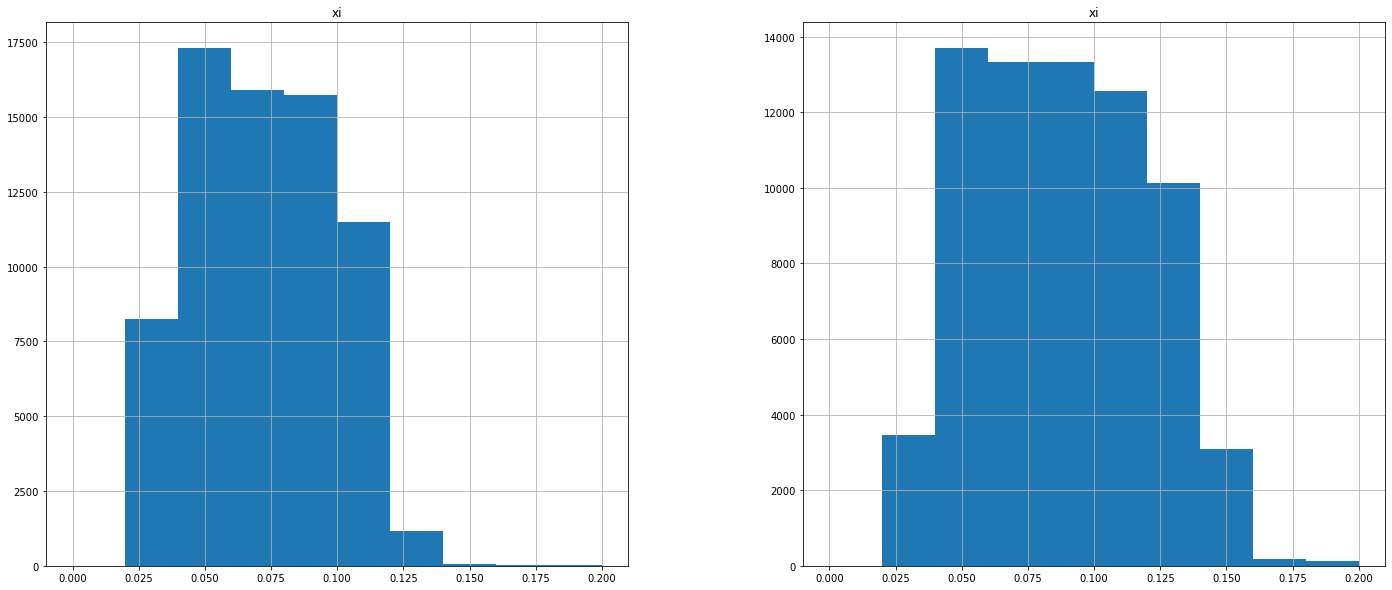

In [10]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP[ df_protons_multiRP.arm == 0 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[0] )
df_protons_multiRP[ df_protons_multiRP.arm == 1 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[1] )

In [11]:
df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]
df_protons_multiRP_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 216       302550016  0      253.968201 -0.707324  2.950644   
297292 87        162028576  0      211.335602  0.778516 -2.783820   
297050 23        23347598   0      261.334717 -1.010473  1.135294   
       65        78788008   0      223.571411 -0.640955 -1.560675   
       499       605989248  0      247.993744 -0.750684 -1.880714   
297411 315       507722016  0      202.485367 -1.909996 -2.974470   
       377       608603776  0      241.069107 -0.283513  2.425223   
299149 138       158817600  0      253.141800  0.841983 -2.930219   
297177 103       155861312  0      205.575821  1.169397 -2.365454   
       112       168879968  0      249.287399 -0.463456  0.465937   
297057 359       451236608  0      394.285278  0.398574 -1.529445   
297219 2173      3099827968 0      288.619812  0.455739  0.454244   
                 3099778304 0      375.724274  0.520944 -0.466679   
                 3100205568 0      247.402695 -1.569887  0.242396   
297425 58        92710800   0      456.756805 -0.825246  1.224345   
297050 640       759692672  0      356.842926 -1.857062  1.034243   
       658       778318912  0      323.938354 -2.283609  2.840562   
       633       752294720  0      281.741394  1.049507  3.116731   
                 752405312  0      203.592255 -1.403587  1.493702   
       635       754300416  0      278.962280  2.154710 -2.295970   
       634       753442816  0      460.727081  1.591670  1.678488   
297178 492       640713216  0      265.786072 -1.436197  2.916315   
       928       1117250816 0      221.970551  1.839407 -2.844628   
       934       1123346688 0      216.444809 -1.182309  0.281944   
       18        25319148   0      294.096222  0.964350 -0.131271   
297050 713       835222272  0      343.445770 -0.632300  2.582244   
       19        18894216   0      200.613113  0.484759  0.502355   
       86        108647864  0      256.000824 -1.426670 -1.053994   
299062 265       435280032  0      244.149170 -0.604448 -0.558302   
297292 584       1052260864 0      231.880005  1.772941  1.878061   
...                                       ...       ...       ...   
297219 117       242083680  19     225.242004  0.556661 -1.112540   
       1210      2020894336 19     241.223404  0.355191  2.623128   
       1276      2106427904 19     262.742157  1.503262 -1.887769   
297227 126       93312096   19     365.417816 -2.336896 -1.182614   
297292 735       1310202496 19     389.847229  0.047716 -1.356946   
297101 951       1191064320 19     223.987534  1.143491  1.432250   
297177 72        108849488  19     249.832886 -0.903532 -2.706336   
       84        127477016  19     211.561172  0.477035  2.647899   
297292 613       1101839872 19     223.413330  0.460259 -1.636167   
                 1102191488 19     278.780334  0.077701  1.161882   
297293 49        76548688   19     257.858459 -1.778975 -1.773533   
       64        99358120   19     234.210129  1.632583 -2.578409   
297050 436       534591200  19     382.243103 -1.720764 -2.107738   
297219 867       1546921728 19     216.012039  0.831251  2.651400   
297292 596       1072594240 19     408.735779  0.713856  1.828017   
297050 461       563410560  19     214.138031  0.819221 -2.451088   
                 563402240  19     211.010986  1.955402  2.383225   
       498       604656000  19     265.806152  0.768868  1.055432   
       508       616064192  19     287.519287  0.713193 -0.746772   
299149 469       680399872  19     260.126099  1.544443  2.294447   
                 680030912  19     209.659363 -1.111055 -1.093321   
297219 1204      2012170368 19     269.481415 -1.845769  2.069491   
297227 88        63932852   19     242.787384  0.192830  1.529834   
       104       76105488   19     317.483704  0.832230  0.358471   
297429 4         5708822    19     205.572205 -0.066537 -2.887983   
299067 407       503687328  19     2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f196aaf4350>],
      dtype=object)

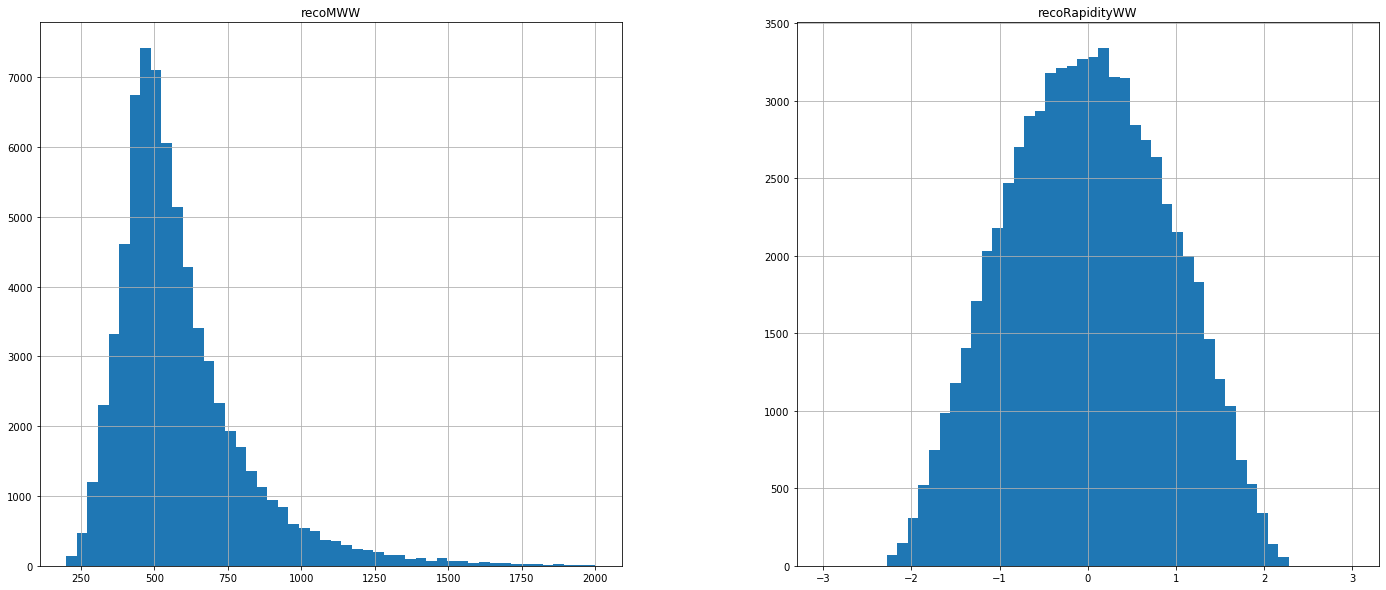

In [12]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "recoMWW", bins=50, range=(200.,2000.), ax=axes[0] )
df_protons_multiRP_events.hist( "recoRapidityWW", bins=50, range=(-3.,3.), ax=axes[1] )

In [14]:
#list( df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ) )
#df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: print( df_.iloc[0].xi, df_.iloc[1].xi ) )
df_protons_multiRP_events_groupby = df_protons_multiRP_index[ ["xi"] ].groupby( ["run","lumiblock","event","slice"] )
df_protons_multiRP_events[ "MX" ] = df_protons_multiRP_events_groupby.apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
df_protons_multiRP_events[ "YX" ] = df_protons_multiRP_events_groupby.apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
df_protons_multiRP_events[ "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
df_protons_multiRP_events[ "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
df_protons_multiRP_events[ "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
df_protons_multiRP_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 216       302550016  0      253.968201 -0.707324  2.950644   
297292 87        162028576  0      211.335602  0.778516 -2.783820   
297050 23        23347598   0      261.334717 -1.010473  1.135294   
       65        78788008   0      223.571411 -0.640955 -1.560675   
       499       605989248  0      247.993744 -0.750684 -1.880714   
297411 315       507722016  0      202.485367 -1.909996 -2.974470   
       377       608603776  0      241.069107 -0.283513  2.425223   
299149 138       158817600  0      253.141800  0.841983 -2.930219   
297177 103       155861312  0      205.575821  1.169397 -2.365454   
       112       168879968  0      249.287399 -0.463456  0.465937   
297057 359       451236608  0      394.285278  0.398574 -1.529445   
297219 2173      3099827968 0      288.619812  0.455739  0.454244   
                 3099778304 0      375.724274  0.520944 -0.466679   
                 3100205568 0      247.402695 -1.569887  0.242396   
297425 58        92710800   0      456.756805 -0.825246  1.224345   
297050 640       759692672  0      356.842926 -1.857062  1.034243   
       658       778318912  0      323.938354 -2.283609  2.840562   
       633       752294720  0      281.741394  1.049507  3.116731   
                 752405312  0      203.592255 -1.403587  1.493702   
       635       754300416  0      278.962280  2.154710 -2.295970   
       634       753442816  0      460.727081  1.591670  1.678488   
297178 492       640713216  0      265.786072 -1.436197  2.916315   
       928       1117250816 0      221.970551  1.839407 -2.844628   
       934       1123346688 0      216.444809 -1.182309  0.281944   
       18        25319148   0      294.096222  0.964350 -0.131271   
297050 713       835222272  0      343.445770 -0.632300  2.582244   
       19        18894216   0      200.613113  0.484759  0.502355   
       86        108647864  0      256.000824 -1.426670 -1.053994   
299062 265       435280032  0      244.149170 -0.604448 -0.558302   
297292 584       1052260864 0      231.880005  1.772941  1.878061   
...                                       ...       ...       ...   
297219 117       242083680  19     225.242004  0.556661 -1.112540   
       1210      2020894336 19     241.223404  0.355191  2.623128   
       1276      2106427904 19     262.742157  1.503262 -1.887769   
297227 126       93312096   19     365.417816 -2.336896 -1.182614   
297292 735       1310202496 19     389.847229  0.047716 -1.356946   
297101 951       1191064320 19     223.987534  1.143491  1.432250   
297177 72        108849488  19     249.832886 -0.903532 -2.706336   
       84        127477016  19     211.561172  0.477035  2.647899   
297292 613       1101839872 19     223.413330  0.460259 -1.636167   
                 1102191488 19     278.780334  0.077701  1.161882   
297293 49        76548688   19     257.858459 -1.778975 -1.773533   
       64        99358120   19     234.210129  1.632583 -2.578409   
297050 436       534591200  19     382.243103 -1.720764 -2.107738   
297219 867       1546921728 19     216.012039  0.831251  2.651400   
297292 596       1072594240 19     408.735779  0.713856  1.828017   
297050 461       563410560  19     214.138031  0.819221 -2.451088   
                 563402240  19     211.010986  1.955402  2.383225   
       498       604656000  19     265.806152  0.768868  1.055432   
       508       616064192  19     287.519287  0.713193 -0.746772   
299149 469       680399872  19     260.126099  1.544443  2.294447   
                 680030912  19     209.659363 -1.111055 -1.093321   
297219 1204      2012170368 19     269.481415 -1.845769  2.069491   
297227 88        63932852   19     242.787384  0.192830  1.529834   
       104       76105488   19     317.483704  0.832230  0.358471   
297429 4         5708822    19     205.572205 -0.066537 -2.887983   
299067 407       503687328  19     2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f196a7025d0>],
      dtype=object)

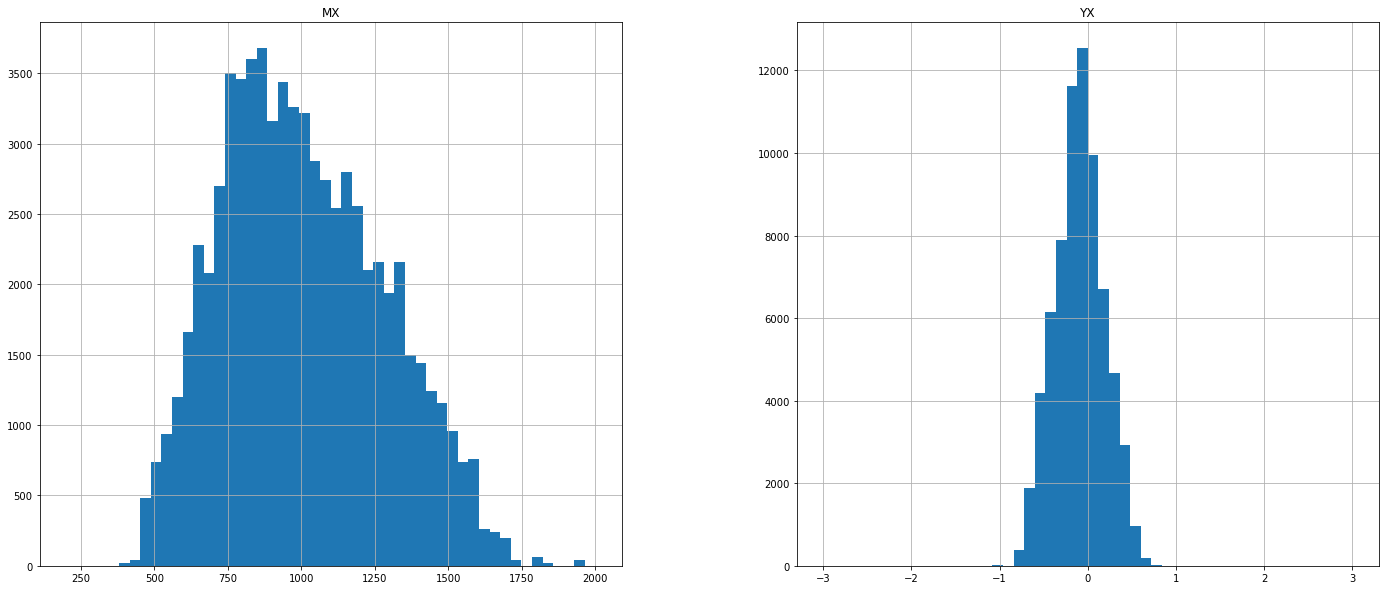

In [15]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "MX", bins=50, range=(200.,2000.), ax=axes[0] )
df_protons_multiRP_events.hist( "YX", bins=50, range=(-3.,3.), ax=axes[1] )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1970134610>],
      dtype=object)

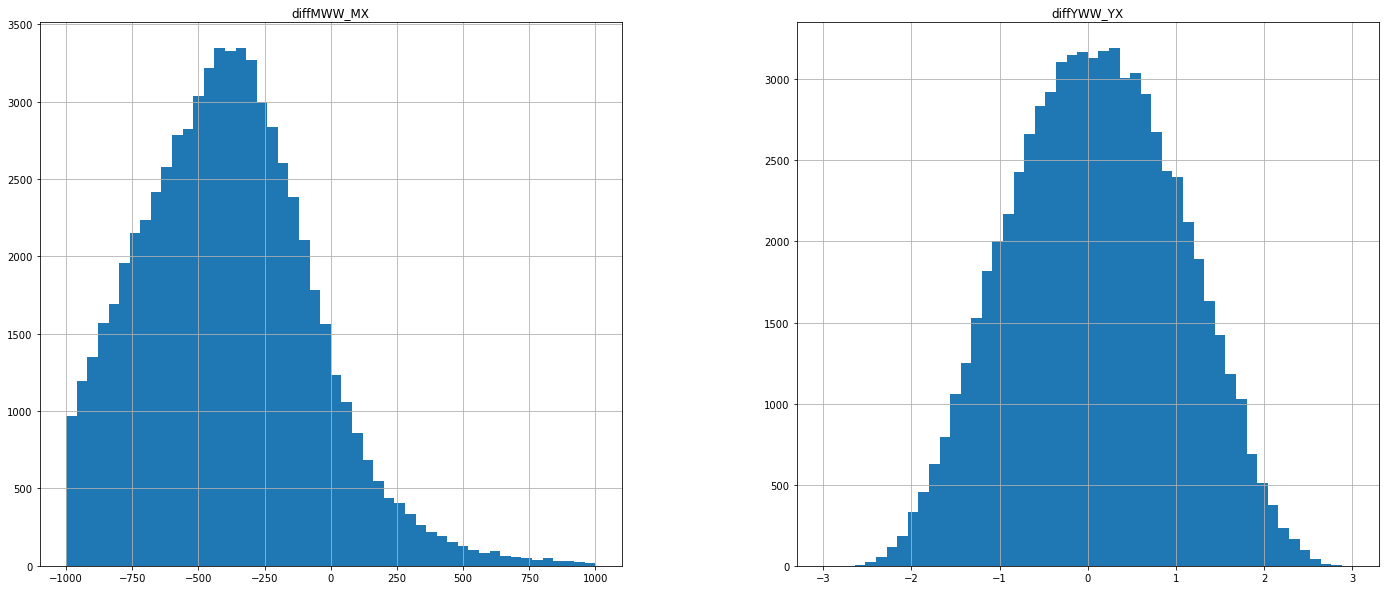

In [16]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "diffMWW_MX", bins=50, range=(-1000.,1000.), ax=axes[0] )
df_protons_multiRP_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), ax=axes[1] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f196acc70d0>]],
      dtype=object)

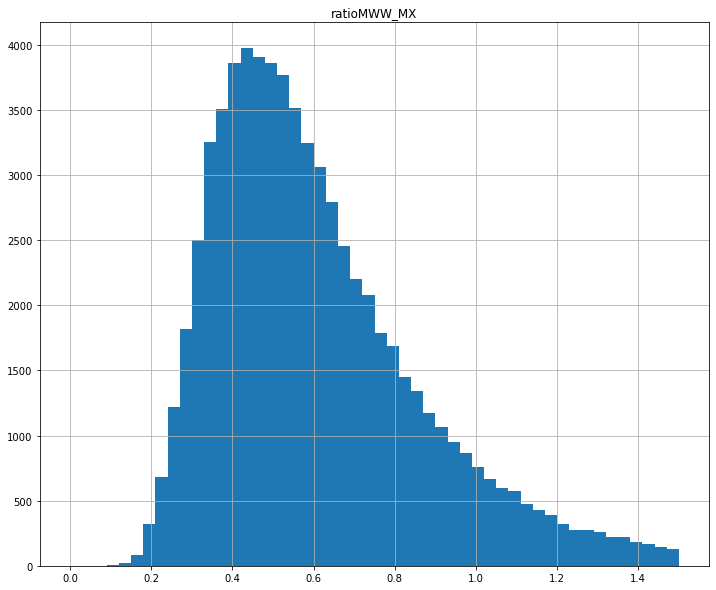

In [17]:
df_protons_multiRP_events.hist( "ratioMWW_MX", bins=50, range=(0.,1.5), figsize=(12,10) )

(-3.0, 3.0)

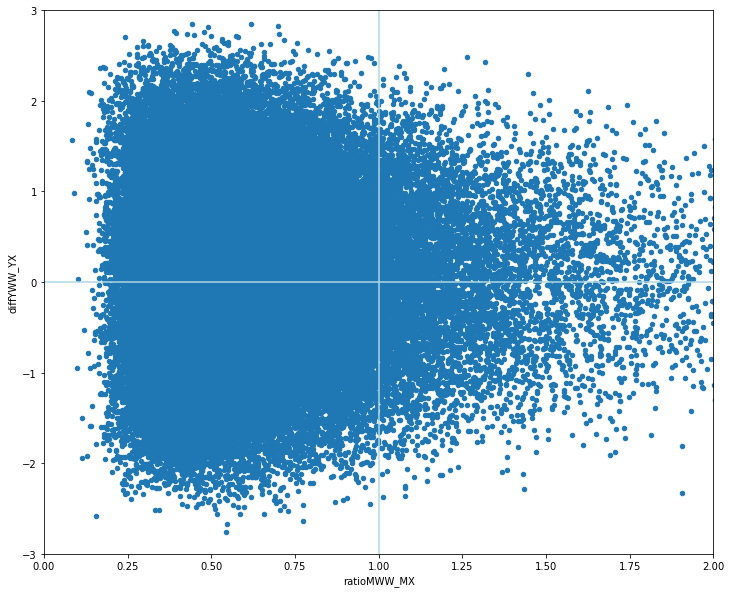

In [22]:
fig = plt.figure( figsize=(12,10) )
plt.plot( (0.,2.), (0.,0.), color='lightblue' )
plt.plot( (1.,1.), (-3.,3.), color='lightblue' )
ax = plt.gca()
df_protons_multiRP_events.plot( "ratioMWW_MX", "diffYWW_YX", 'scatter', ax=ax )
plt.xlim(0., 2.0)
plt.ylim(-3., 3.)

In [19]:
df_protons_singleRP

,run,lumiblock,event,slice,xi,thx,thy,t,ismultirp,rpid,...,WLeptonicPt,WLeptonicPhi,run_rnd,lumiblock_rnd,event_rnd,slice_rnd,trackx1,tracky1,trackpixshift1,rpid1
0,297101,216,302550016,0,0.058114,0.0,-0.000065,-0.170016,0,3,...,180.971115,-1.028811,297101,164,232291296,12,5.621094,1.065674,0,3
1,297101,216,302550016,0,0.058885,0.0,-0.000065,-0.171967,0,23,...,180.971115,-1.028811,297101,164,232291296,12,5.739746,1.239502,0,23
2,297101,216,302550016,0,0.119613,0.0,-0.000076,-0.227285,0,103,...,180.971115,-1.028811,297101,164,232291296,12,8.532715,3.935059,0,103
3,297101,216,302550016,0,0.120721,0.0,-0.000075,-0.221218,0,123,...,180.971115,-1.028811,297101,164,232291296,12,8.485718,4.192871,0,123
4,297292,87,162028576,0,0.049381,0.0,0.000033,-0.044686,0,3,...,224.381348,0.387279,297425,82,130758992,12,4.710205,-0.389496,0,3
5,297292,87,162028576,0,0.051145,0.0,0.000029,-0.037284,0,23,...,224.381348,0.387279,297425,82,130758992,12,4.923218,-0.440033,0,23
6,297292,87,162028576,0,0.090034,0.0,-0.000066,-0.174788,0,103,...,224.381348,0.387279,297425,82,130758992,12,6.174561,2.247559,0,103
7,297292,87,162028576,0,0.091608,0.0,-0.000065,-0.168132,0,123,...,224.381348,0.387279,297425,82,130758992,12,6.192932,2.448730,0,123
8,297050,23,23347598,0,0.038146,0.0,-0.000062,-0.158350,0,3,...,268.042572,-2.130570,297100,271,492839776,6,3.574829,0.398071,0,3
9,297050,23,23347598,0,0.037816,0.0,-0.000062,-0.156734,0,23,...,268.042572,-2.130570,297100,271,492839776,6,3.563660,0.499451,0,23


In [23]:
df_protons_singleRP_index = df_protons_singleRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )
df_protons_singleRP_index

xi  thx       thy         t  \
run    lumiblock event     slice                                      
297101 216       302550016 0      0.058114  0.0 -0.000065 -0.170016   
                           0      0.058885  0.0 -0.000065 -0.171967   
                           0      0.119613  0.0 -0.000076 -0.227285   
                           0      0.120721  0.0 -0.000075 -0.221218   
297292 87        162028576 0      0.049381  0.0  0.000033 -0.044686   
                           0      0.051145  0.0  0.000029 -0.037284   
                           0      0.090034  0.0 -0.000066 -0.174788   
                           0      0.091608  0.0 -0.000065 -0.168132   
297050 23        23347598  0      0.038146  0.0 -0.000062 -0.158350   
                           0      0.037816  0.0 -0.000062 -0.156734   
                           0      0.096123  0.0  0.000055 -0.125522   
                           0      0.036148  0.0 -0.000044 -0.078552   
                           0      0.099685  0.0  0.000054 -0.119248   
       65        78788008  0      0.093541  0.0 -0.000077 -0.236928   
                           0      0.093419  0.0 -0.000078 -0.240313   
                           0      0.096112  0.0 -0.000046 -0.090806   
                           0      0.097041  0.0 -0.000046 -0.089253   
       499       605989248 0      0.046261  0.0  0.000029 -0.035408   
                           0      0.046309  0.0  0.000029 -0.036018   
                           0      0.053134  0.0 -0.000089 -0.318305   
                           0      0.055238  0.0 -0.000085 -0.293262   
297411 315       507722016 0      0.076643  0.0 -0.000105 -0.432200   
                           0      0.073437  0.0 -0.000106 -0.446885   
                           0      0.056163  0.0 -0.000011 -0.008186   
                           0      0.052596  0.0 -0.000010 -0.006899   
       377       608603776 0      0.033701  0.0 -0.000161 -1.061679   
                           0      0.032906  0.0 -0.000165 -1.108667   
                           0      0.051443  0.0 -0.000056 -0.127654   
                           0      0.052652  0.0 -0.000054 -0.120687   
299149 138       158817600 0      0.100374  0.0 -0.000115 -0.509247   
...                                    ...  ...       ...       ...   
297227 104       76105488  19     0.083559  0.0 -0.000108 -0.459979   
                           19     0.102374  0.0 -0.000064 -0.165395   
                           19     0.104890  0.0 -0.000062 -0.156836   
297429 4         5708822   19     0.037192  0.0 -0.000232 -2.197155   
                           19     0.036015  0.0 -0.000240 -2.350044   
                           19     0.092973  0.0 -0.000103 -0.418810   
                           19     0.093716  0.0 -0.000102 -0.407320   
299067 407       503687328 19     0.098427  0.0 -0.000041 -0.074986   
                           19     0.099765  0.0 -0.000041 -0.074145   
                           19     0.110876  0.0 -0.000087 -0.294997   
                           19     0.107123  0.0 -0.000014 -0.018474   
                           19     0.109455  0.0 -0.000087 -0.294505   
297178 111       155450912 19     0.038064  0.0 -0.000153 -0.951223   
                           19     0.036938  0.0 -0.000158 -1.017950   
                           19     0.128999  0.0 -0.000048 -0.101720   
                           19     0.032043  0.0 -0.000030 -0.038257   
                           19     0.130981  0.0 -0.000047 -0.098405   
297292 373       670214272 19     0.097766  0.0  0.000070 -0.198050   
                           19     0.097273  0.0  0.000071 -0.202406   
                           19     0.101148  0.0  0.000023 -0.030457   
                           19     0.032620  0.0  0.000376 -5.781161   
                           19     0.102479  0.0  0.000023 -0.030612   
       361       648401472 19     0.076280  0.0  0.000050 -0.101642   
                           19     0.076756  0.0  0.000050 -0.101

In [24]:
df_ppstracks

,run,lumiblock,event,slice,x,y,rpid,run_rnd,lumiblock_rnd,event_rnd,slice_rnd
0,297101,216,302550016,0,5.621094,1.065674,3,297101,164,232291296,12
1,297101,216,302550016,0,8.532715,3.935059,103,297101,164,232291296,12
2,297101,216,302550016,0,5.739746,1.239502,23,297101,164,232291296,12
3,297101,216,302550016,0,8.485718,4.192871,123,297101,164,232291296,12
4,297292,87,162028576,0,4.710205,-0.389496,3,297425,82,130758992,12
5,297292,87,162028576,0,6.174561,2.247559,103,297425,82,130758992,12
6,297292,87,162028576,0,4.923218,-0.440033,23,297425,82,130758992,12
7,297292,87,162028576,0,6.192932,2.448730,123,297425,82,130758992,12
8,297050,23,23347598,0,3.574829,0.398071,3,297100,271,492839776,6
9,297050,23,23347598,0,6.644775,-2.079834,103,297100,271,492839776,6


In [25]:
df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
#df_ppstracks_index
df_ppstracks_index[ ( df_ppstracks_index.rpid != 16 ) & ( df_ppstracks_index.rpid != 116 ) ]

x         y  rpid  run_rnd  \
run    lumiblock event     slice                                       
297101 216       302550016 0       5.621094  1.065674     3   297101   
                           0       8.532715  3.935059   103   297101   
                           0       5.739746  1.239502    23   297101   
                           0       8.485718  4.192871   123   297101   
297292 87        162028576 0       4.710205 -0.389496     3   297425   
                           0       6.174561  2.247559   103   297425   
                           0       4.923218 -0.440033    23   297425   
                           0       6.192932  2.448730   123   297425   
297050 23        23347598  0       3.574829  0.398071     3   297100   
                           0       6.644775 -2.079834   103   297100   
                           0       3.563660  0.499451    23   297100   
                           0       2.279755  0.322266   123   297100   
                           0       6.810974 -2.298340   123   297100   
       65        78788008  0      10.038574  2.774658     3   297057   
                           0       7.119873  1.742432   103   297057   
                           0      10.110229  3.003418    23   297057   
                           0       7.101318  1.888062   123   297057   
       499       605989248 0       4.390869 -0.299988     3   297469   
                           0       3.478149  1.246216   103   297469   
                           0       4.423218 -0.360596    23   297469   
                           0       3.565552  1.477051   123   297469   
297411 315       507722016 0       7.995361  2.757080     3   297057   
                           0       3.958374  0.178787   103   297057   
                           0       7.683716  2.870117    23   297057   
                           0       3.641418  0.165436   123   297057   
       377       608603776 0       3.136597  0.684998     3   297292   
                           0       3.360474  0.735718   103   297292   
                           0       3.077118  0.926208    23   297292   
                           0       3.387848  0.865784   123   297292   
299149 138       158817600 0      10.416992  4.578613     3   297100   
...                                     ...       ...   ...      ...   
297227 104       76105488  19      7.135498  2.645508   103   297429   
                           19      8.485962  3.548584    23   297429   
                           19      7.216431  2.862061   123   297429   
297429 4         5708822   19      4.056396  1.378418     3   297219   
                           19      8.062500  3.706055   103   297219   
                           19      3.964874  1.721191    23   297219   
                           19      8.078979  4.000000   123   297219   
299067 407       503687328 19     11.122070  1.608765     3   299067   
                           19      8.929199  4.038086   103   299067   
                           19     11.413818  1.746460    23   299067   
                           19      8.492798  0.653870   123   299067   
                           19      8.703735  4.241699   123   299067   
297178 111       155450912 19      4.157227  0.971985     3   297219   
                           19     11.728516  2.788574   103   297219   
                           19      4.072449  1.206055    23   297219   
                           19      2.561310  0.161209   123   297219   
                           19     11.858521  2.963867   123   297219   
297292 373       670214272 19     10.567871 -2.701904     3   297219   
                           19      7.541748 -0.942566   103   297219   
                           19     10.597534 -2.912598    23   297219   
                           19      2.205414 -2.114502   123   297219   
                           19      7.552246 -1.031250   123   297219   
       361       648401472 19      7.600342 -1.298462     3   297411   
          

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1968fa3810>],
      dtype=object)

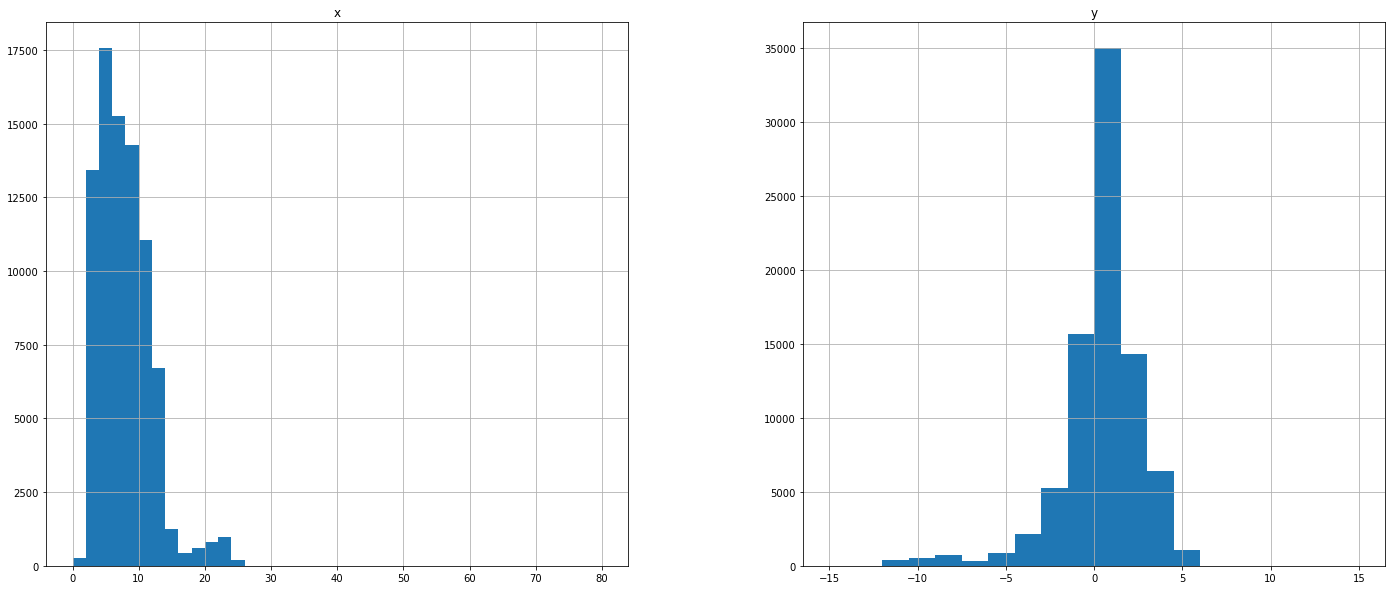

In [26]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_ppstracks[ df_ppstracks.rpid == 23 ].hist( "x", bins=40, range=(0.,80.), ax=axes[0] )
df_ppstracks[ df_ppstracks.rpid == 23 ].hist( "y", bins=20, range=(-15.,15.), ax=axes[1] )

### References

In [ ]:
np.info( ak.concatenate )

In [ ]:
np.info( pd.DataFrame.hist )

In [ ]:
np.info( pd.DataFrame.plot.scatter )

In [ ]:
np.info( plt.plot )